<a href="https://colab.research.google.com/github/PrasannaMadiwar/kaggle_competitions/blob/main/kaggle__completition_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('train.csv')
data1 = data.copy()

In [ ]:
test = pd.read_csv('test.csv')

In [ ]:
df = [data1,test]

In [ ]:
for i in df:
    print(i.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Co

In [ ]:
data1.head(4)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False


<Axes: xlabel='Gruop_no', ylabel='Count'>

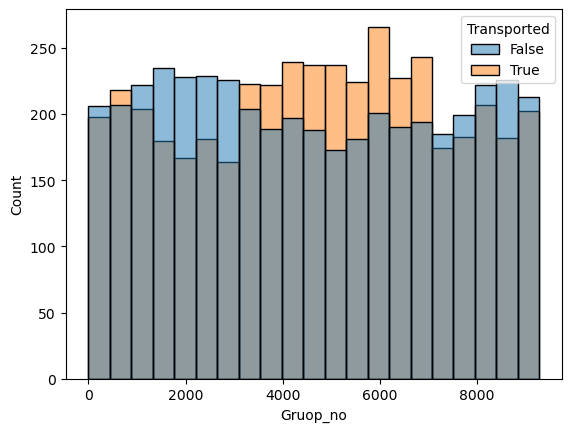

In [ ]:
for val in df:
    val[['Gruop_no','passenger_no']] = val['PassengerId'].str.split('_',expand=True)
    val['Gruop_no'] = pd.to_numeric(val['Gruop_no'],errors='coerce')
sns.histplot(data=data1,x='Gruop_no',hue='Transported')

<Axes: xlabel='Cabin_no', ylabel='Count'>

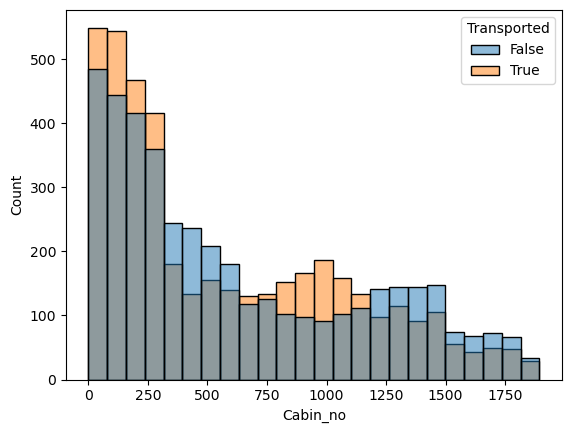

In [ ]:
for val in df:
    val[['Cabin_deck','Cabin_no','Cabin_side']] = val['Cabin'].str.split('/',expand=True)
    val['Cabin_no'] = pd.to_numeric(val['Cabin_no'],errors='coerce')
sns.histplot(data=data1,x='Cabin_no',hue='Transported')

In [ ]:
for val in df :
    val['Cabin_region1'] = (val['Cabin_no'] < 500)
    val['Cabin_region2'] = (val['Cabin_no'] >= 500 )& (val['Cabin_no'] < 1000)
    val['Cabin_region3'] = (val['Cabin_no'] >= 1000) & (val['Cabin_no'] < 1500)
    val['Cabin_region4'] = (val['Cabin_no'] >= 1500)

<Axes: xlabel='Gruop_size', ylabel='count'>

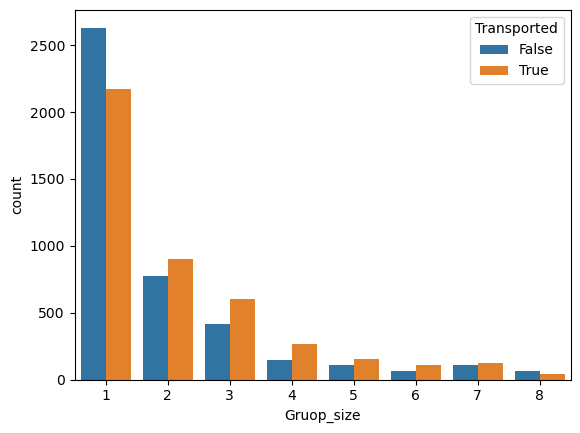

In [ ]:
for val in df:
    size = val['Gruop_no'].value_counts()
    val['Gruop_size'] =  val['Gruop_no'].map(size)
sns.countplot(data=data1,x='Gruop_size',hue='Transported')

In [ ]:
for val in df :
    val['solo'] = val['Gruop_size'] == 1

<Axes: xlabel='Total_spend', ylabel='Count'>

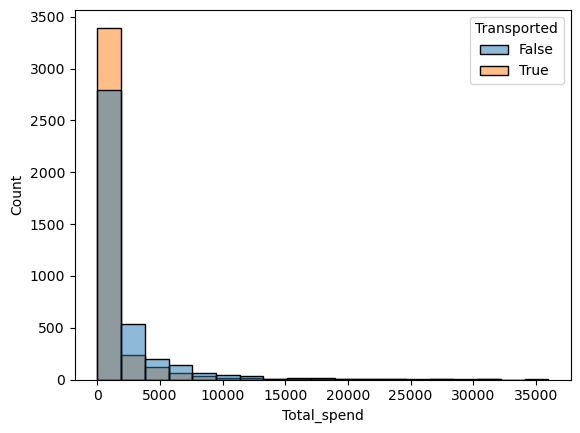

In [ ]:
for val in df :
    val['Total_spend'] = val['RoomService']+val['FoodCourt']+val['ShoppingMall']+val['Spa']+val['VRDeck']
    val['No_spending'] = val['Total_spend'] == 0
sns.histplot(data=data1,x='Total_spend',hue='Transported', bins=19)

<Axes: xlabel='No_spending', ylabel='count'>

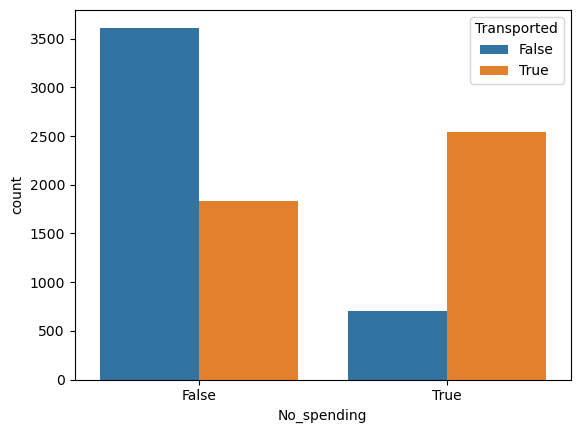

In [ ]:
sns.countplot(data=data1,x='No_spending',hue='Transported')

In [ ]:
for val in df :
        val['Surname'] = val['Name'].str.split().str[-1]

In [ ]:
for val in df:
    s_n = val['Surname'].value_counts().astype(int)
    val['Family_size'] = val['Surname'].map(s_n)

<Axes: xlabel='Family_size', ylabel='count'>

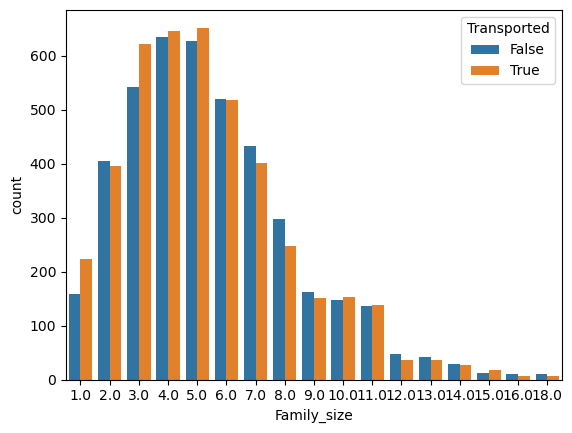

In [ ]:
sns.countplot(data=data1,x='Family_size',hue='Transported')

In [ ]:
for val in df :
    val['Age'] = np.where(val['Age'].isna(),500,val['Age'])
    val['Age_0-20'] = (val['Age'] < 20)
    val['Age_20-40'] = (val['Age'] >= 20) & (val['Age'] < 40)
    val['Age_40-60'] = (val['Age'] >= 40) & (val['Age'] < 60)
    val['Age_60-80'] = (val['Age'] >= 60) & (val['Age'] < 80)
    val['Age_80+'] = (val['Age'] >= 80)
    val['Age'] = np.where(val['Age'] == 500 ,np.nan,val['Age'])



C:\Users\prasa\AppData\Local\Temp\ipykernel_4148\1848912149.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data1['Age'])


<Axes: ylabel='Density'>

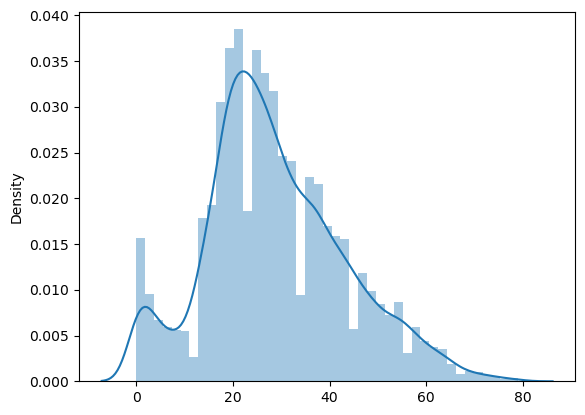

In [ ]:
sns.distplot(x=data1['Age'])

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    8693 non-null   object 
 1   HomePlanet     8492 non-null   object 
 2   CryoSleep      8476 non-null   object 
 3   Cabin          8494 non-null   object 
 4   Destination    8511 non-null   object 
 5   Age            8514 non-null   float64
 6   VIP            8490 non-null   object 
 7   RoomService    8512 non-null   float64
 8   FoodCourt      8510 non-null   float64
 9   ShoppingMall   8485 non-null   float64
 10  Spa            8510 non-null   float64
 11  VRDeck         8505 non-null   float64
 12  Name           8493 non-null   object 
 13  Transported    8693 non-null   bool   
 14  Gruop_no       8693 non-null   int64  
 15  passenger_no   8693 non-null   object 
 16  Cabin_deck     8494 non-null   object 
 17  Cabin_no       8494 non-null   float64
 18  Cabin_si

## EDA

In [ ]:
cat_col = ['HomePlanet','CryoSleep','Destination','VIP','Cabin_deck','Cabin_side','Gruop_size','solo','No_spending','Family_size']
num_col = ['Age','Cabin_no','Total_spend']

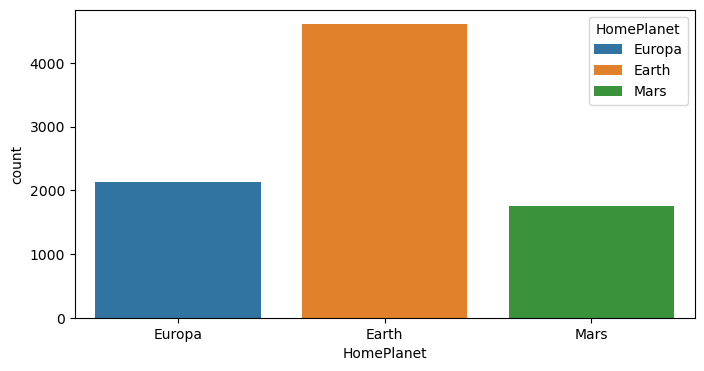

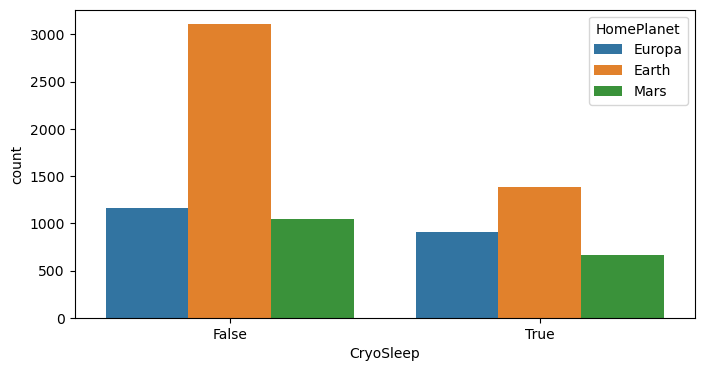

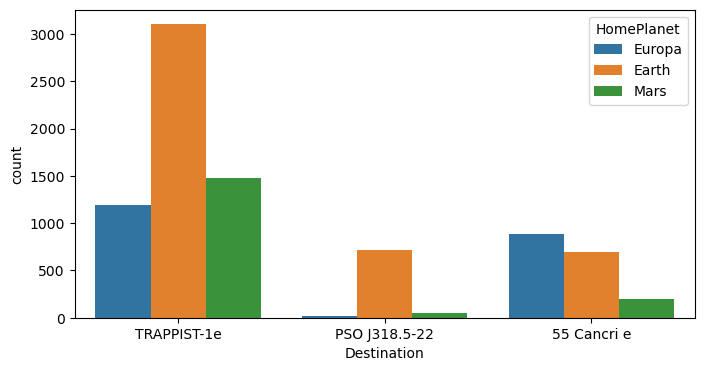

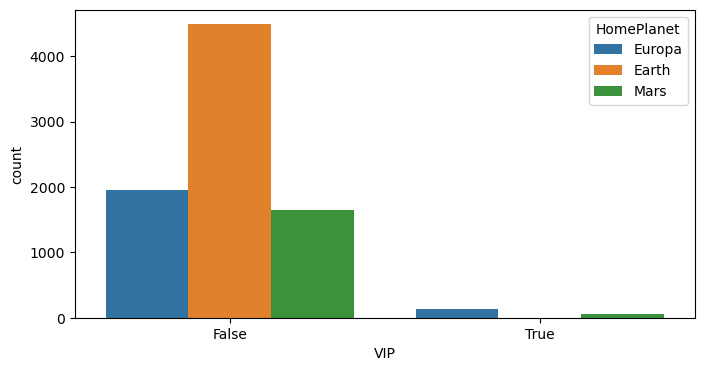

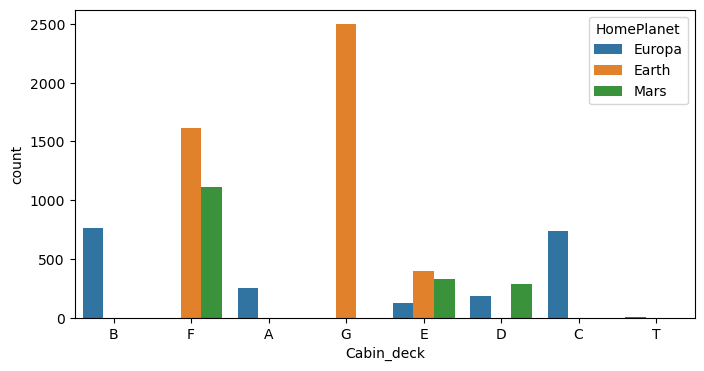

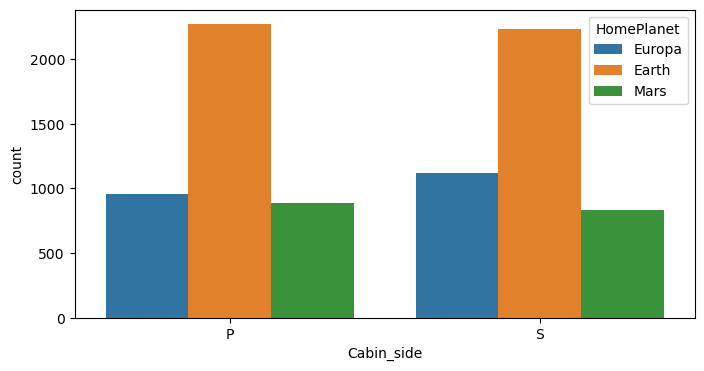

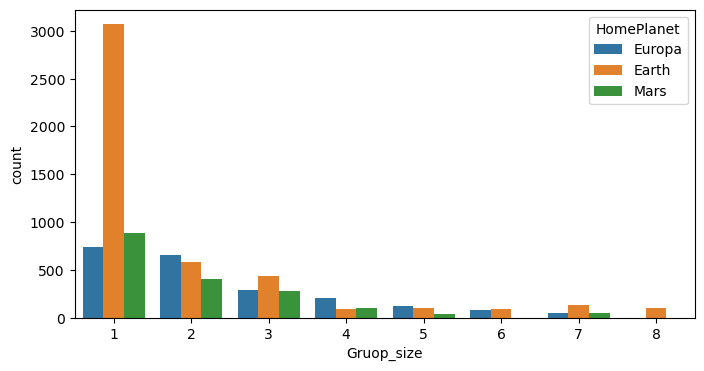

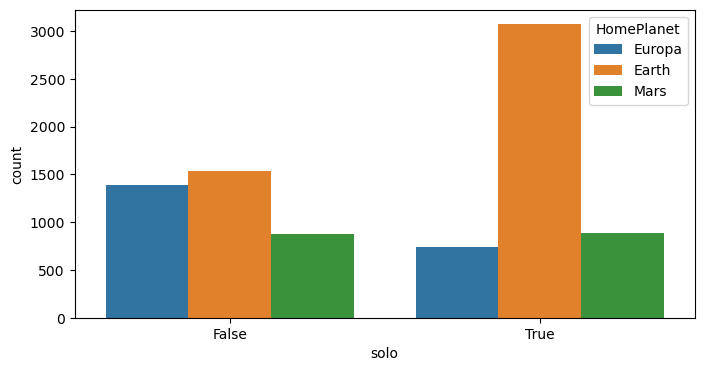

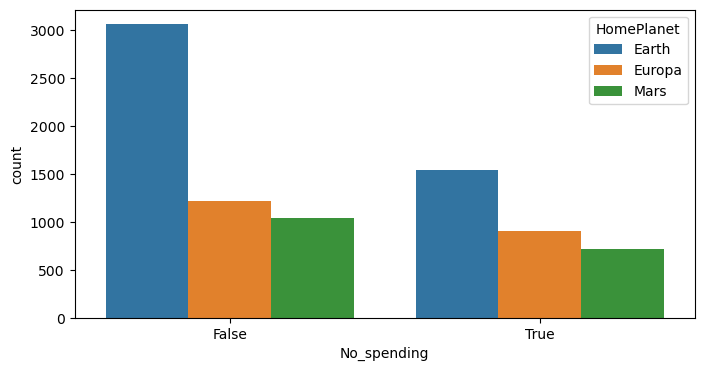

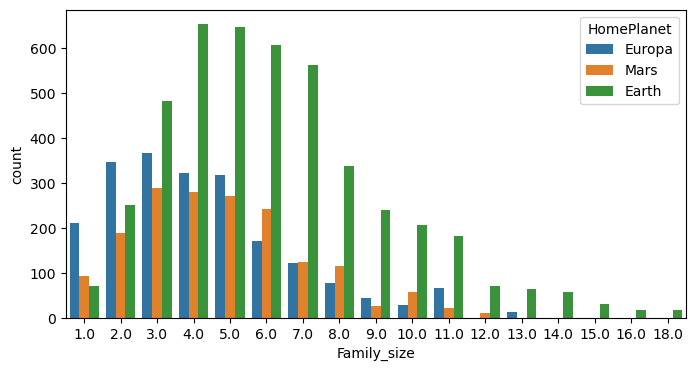

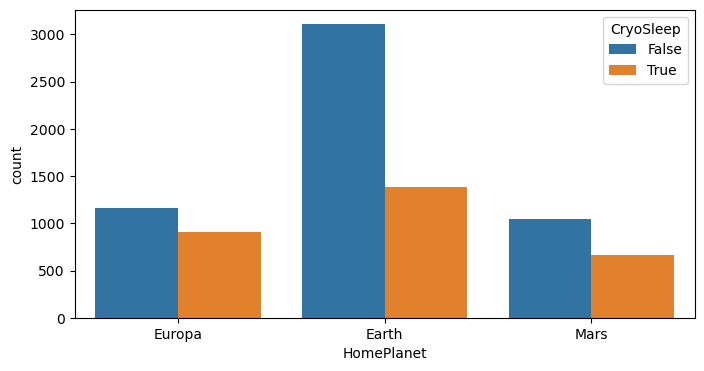

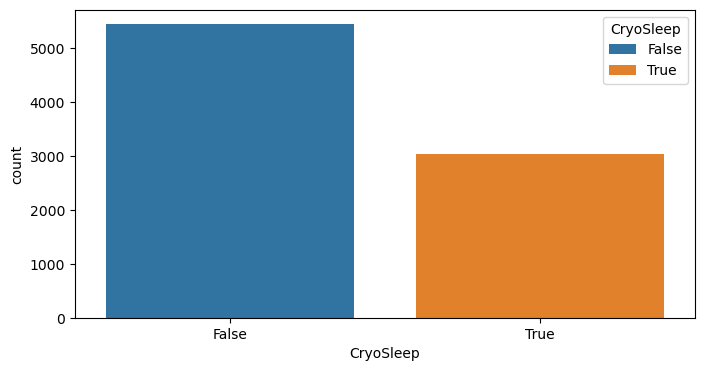

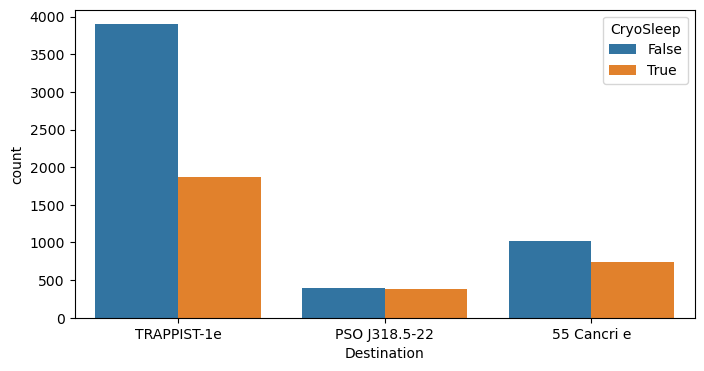

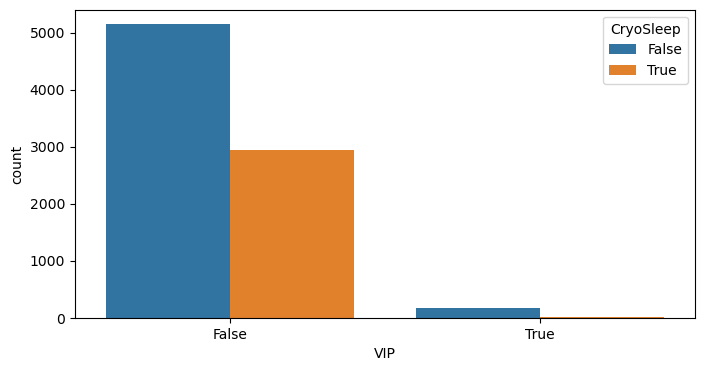

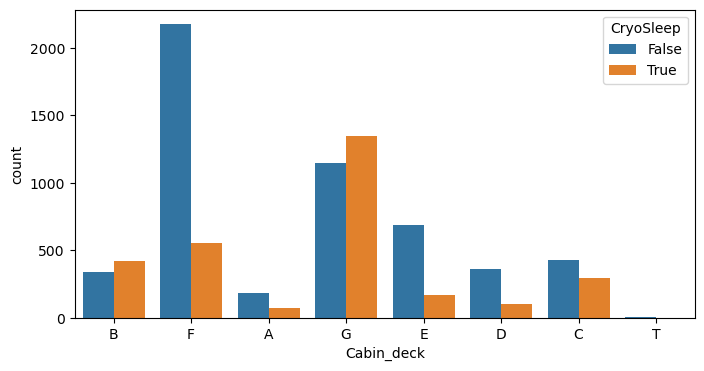

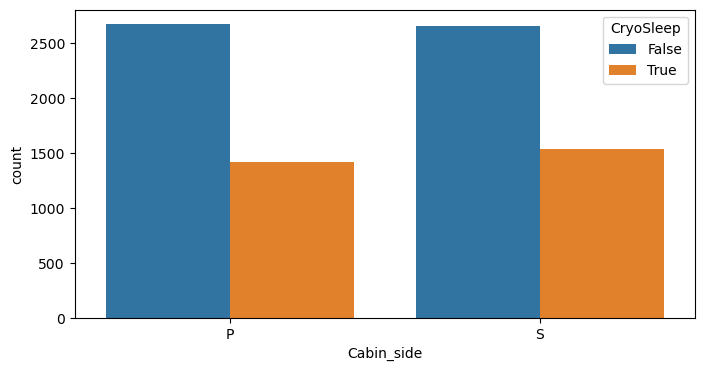

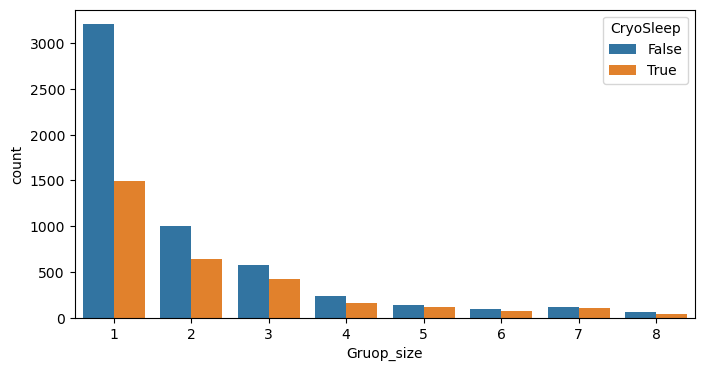

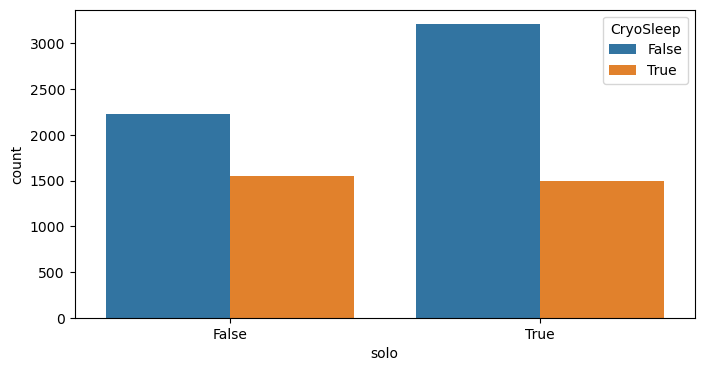

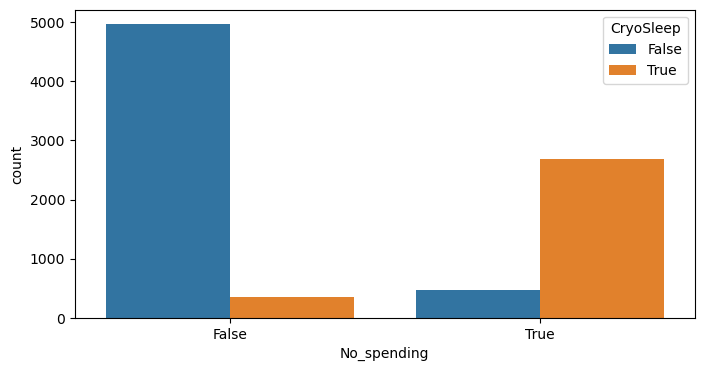

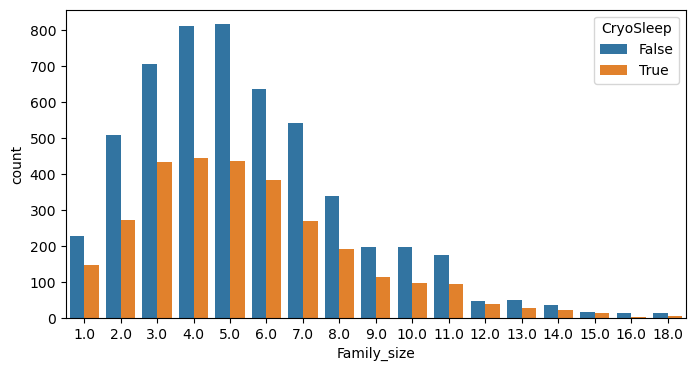

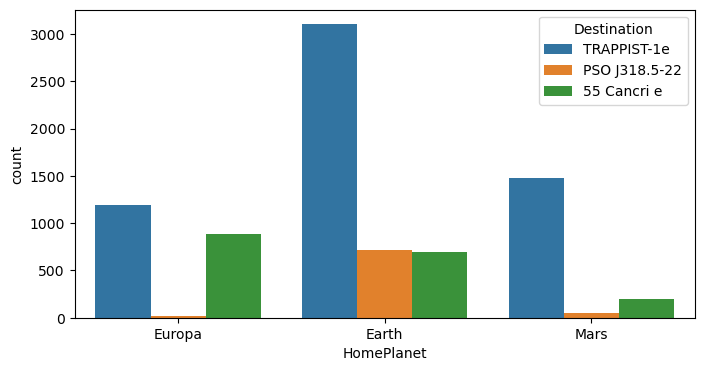

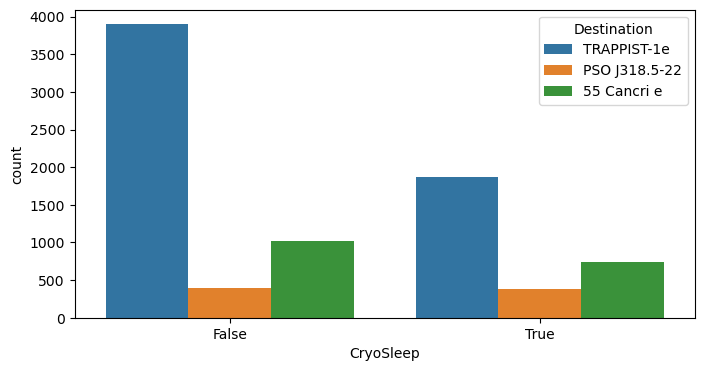

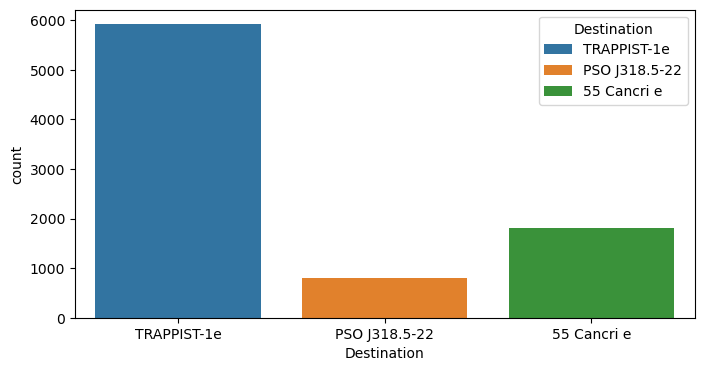

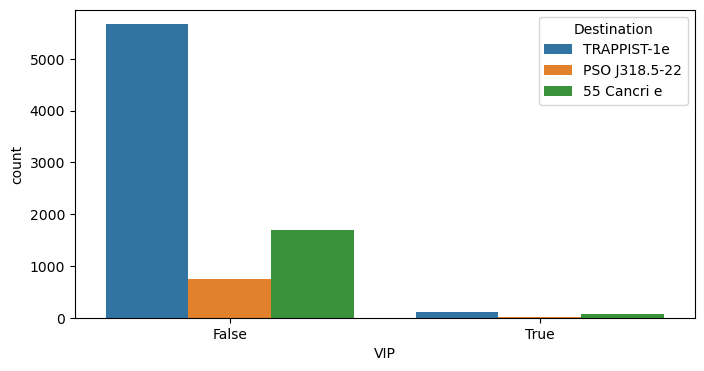

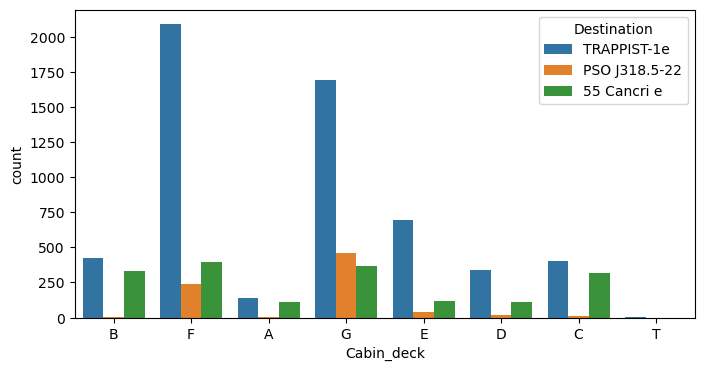

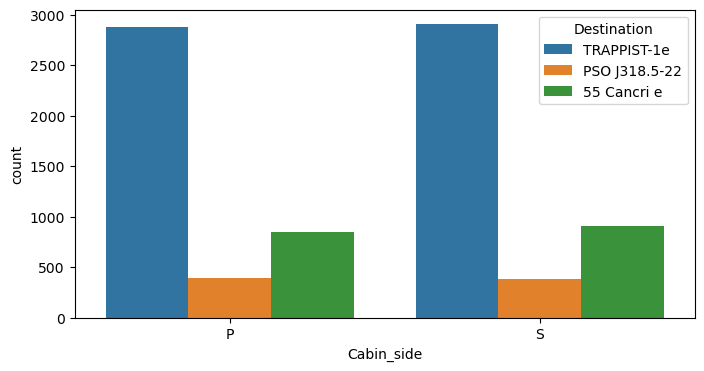

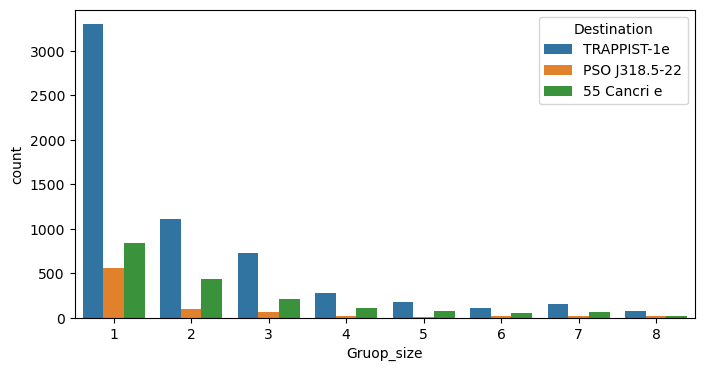

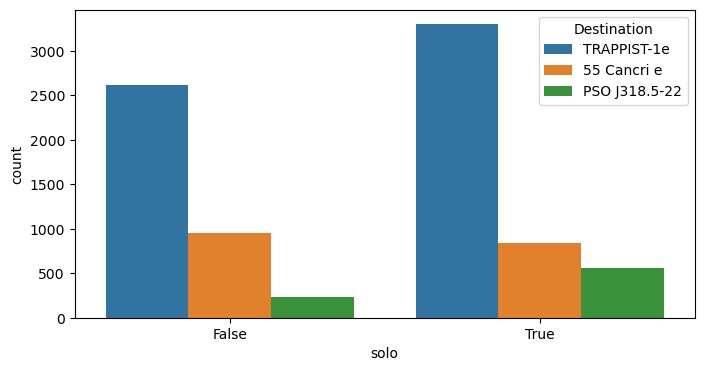

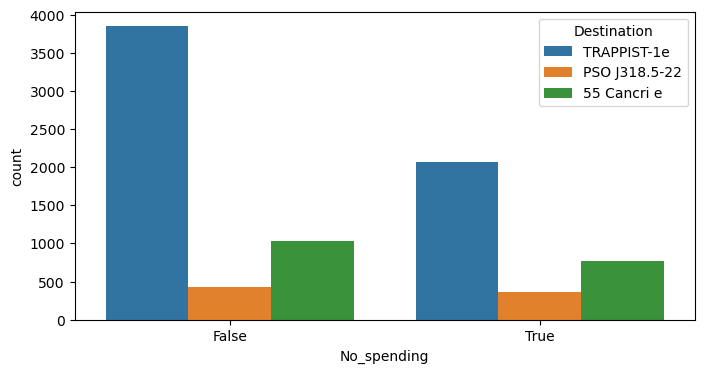

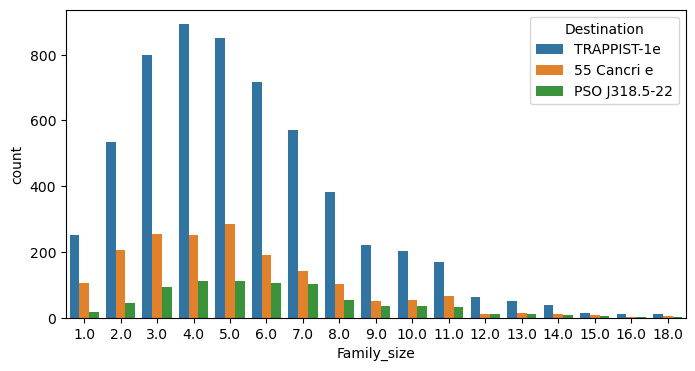

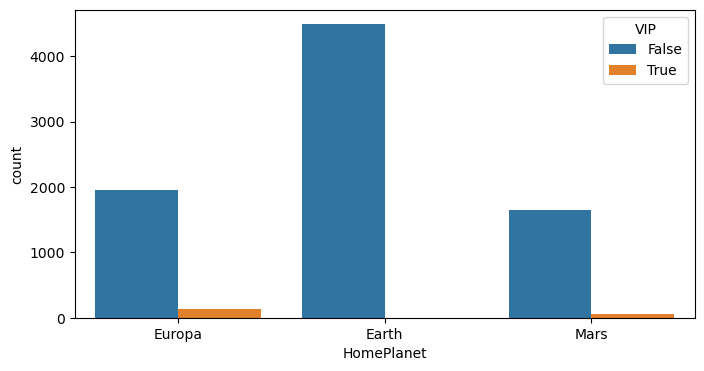

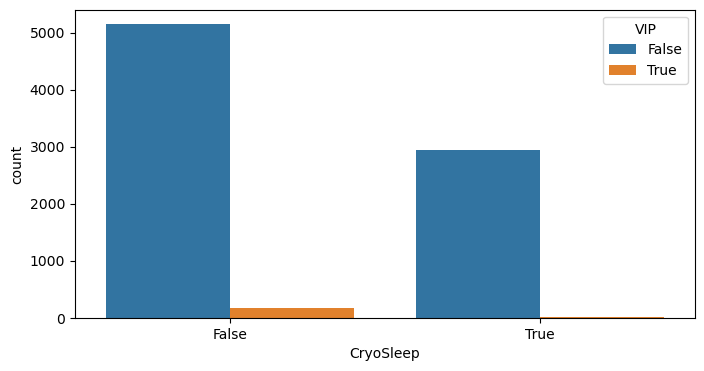

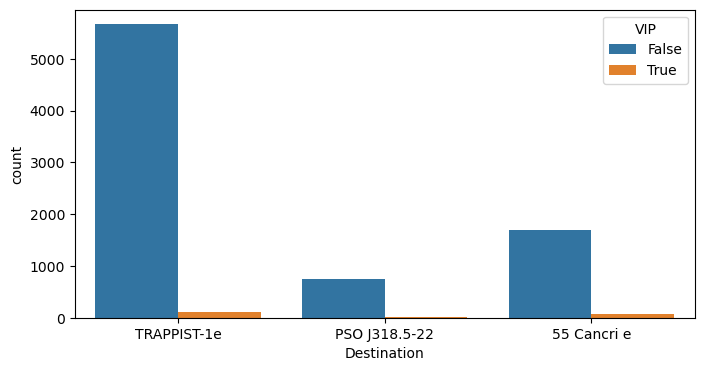

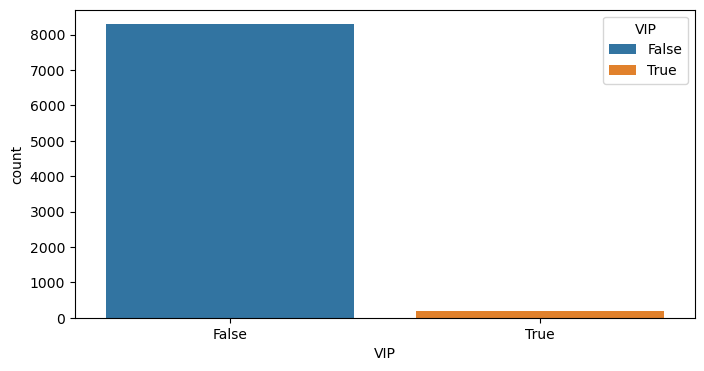

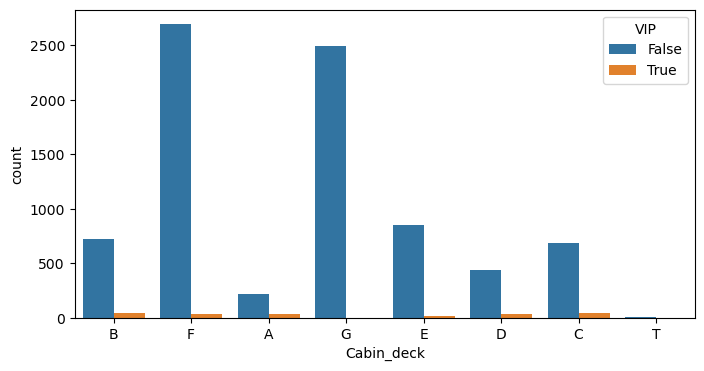

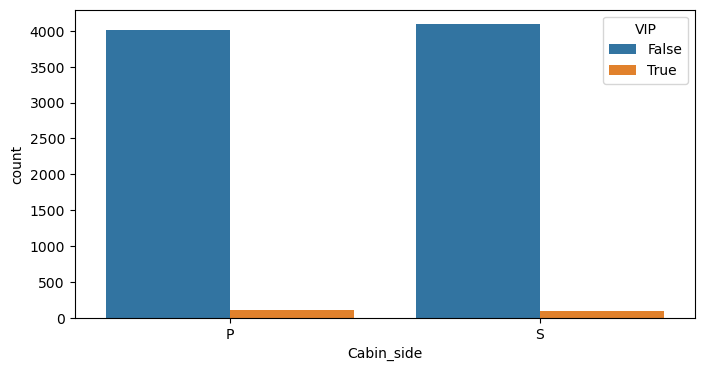

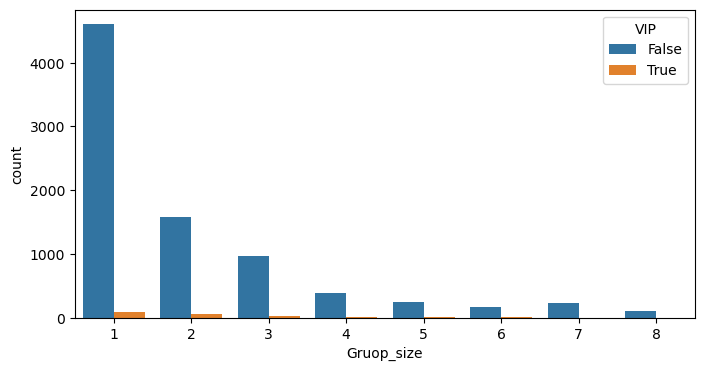

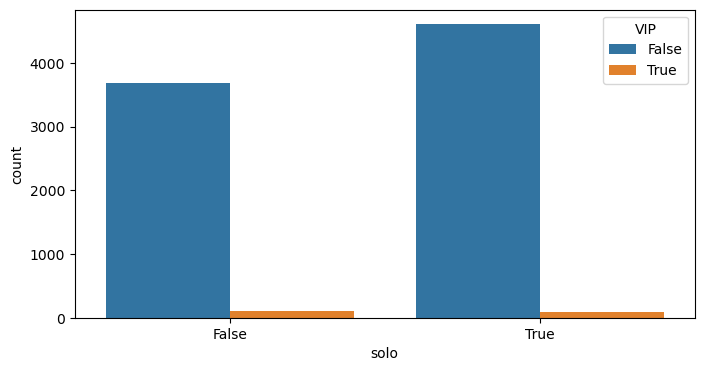

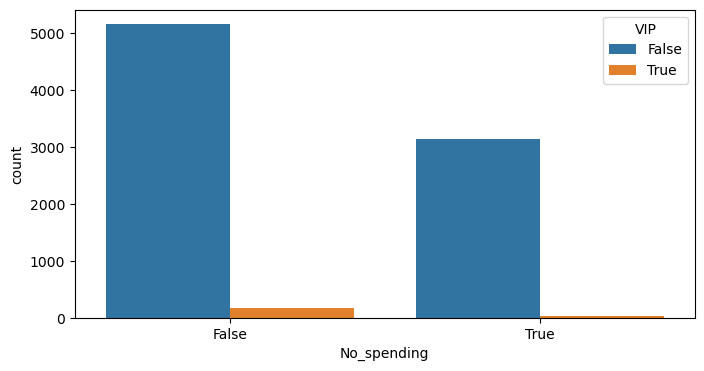

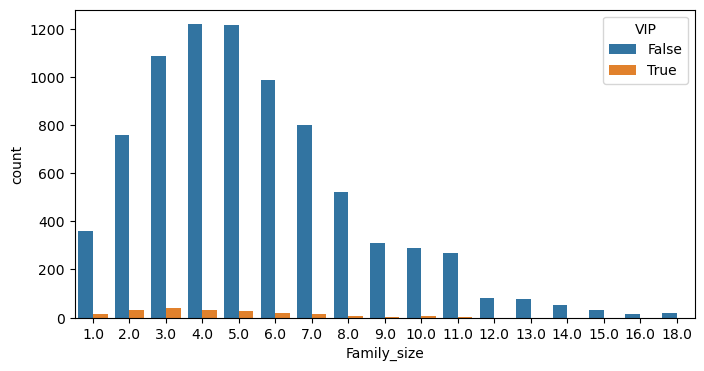

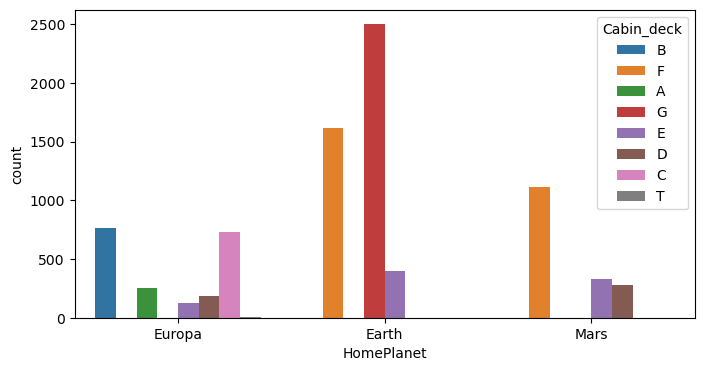

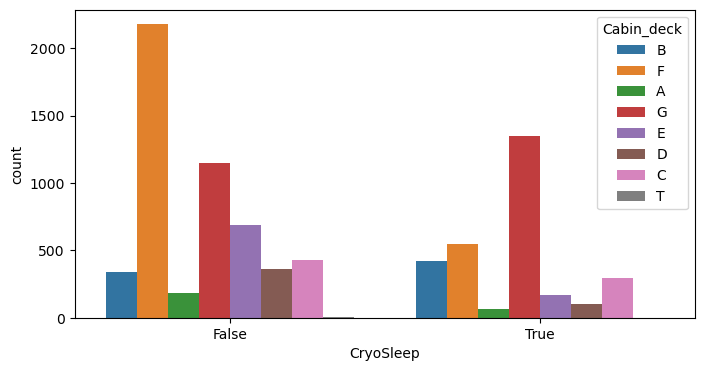

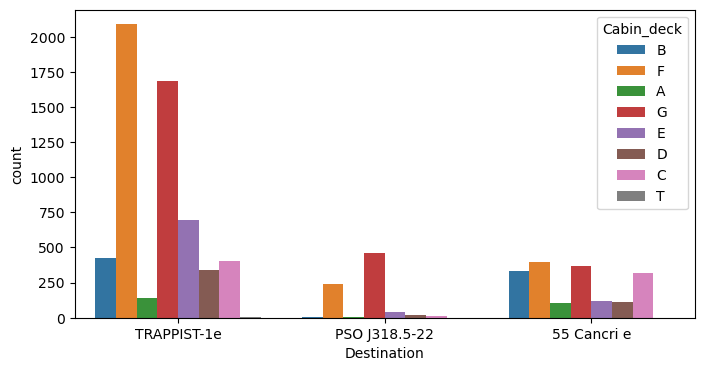

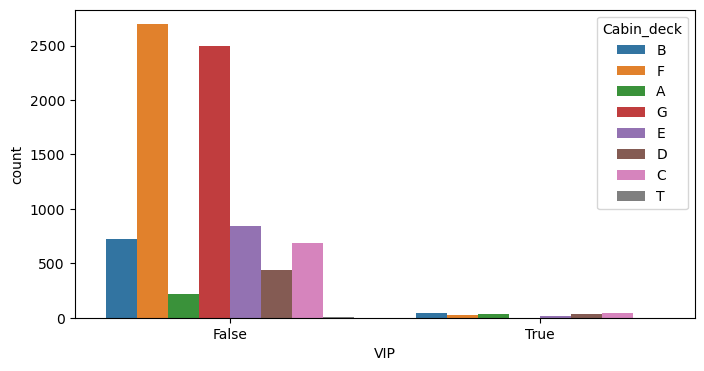

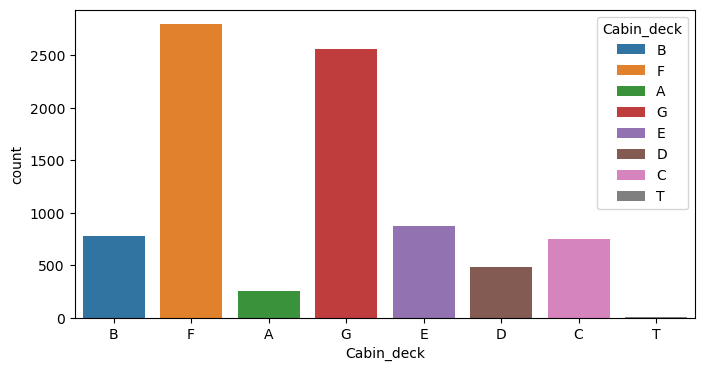

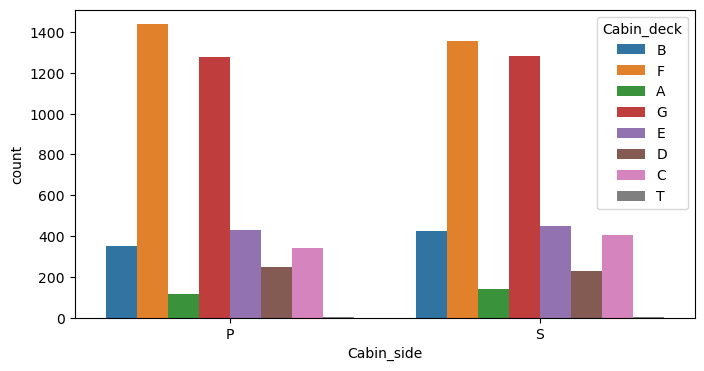

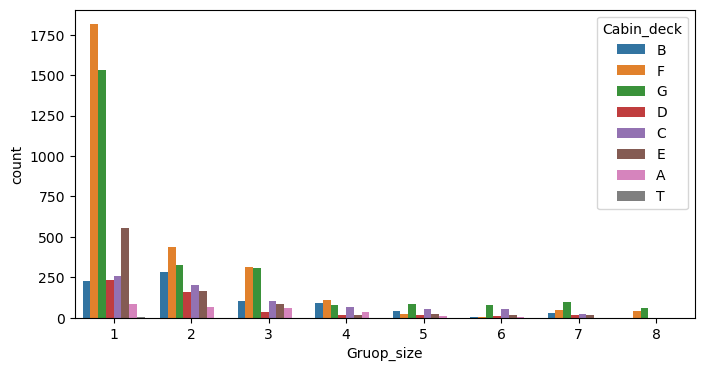

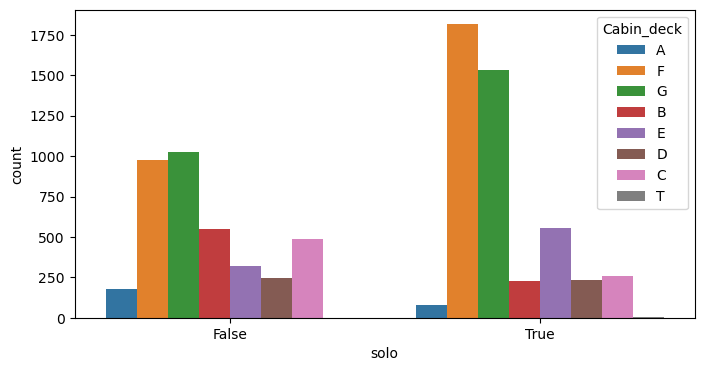

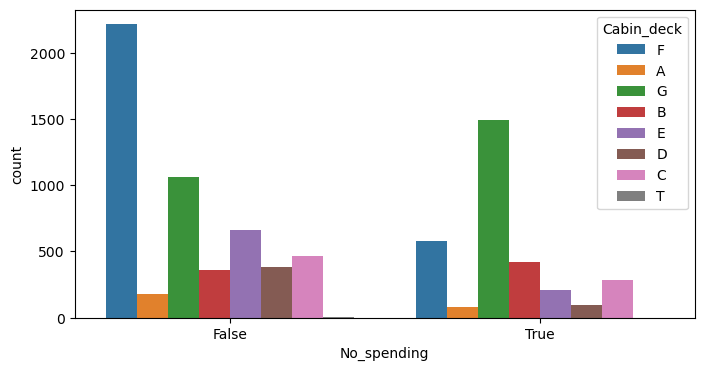

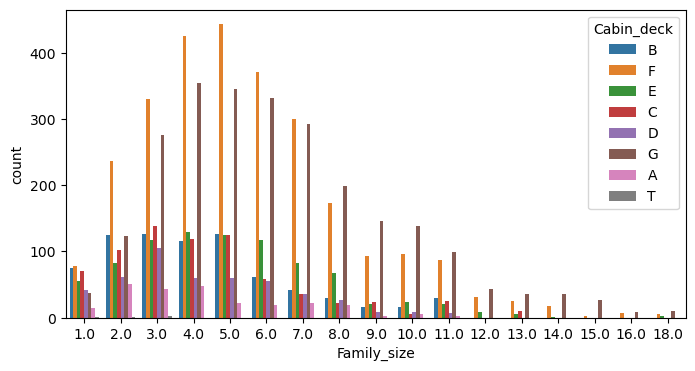

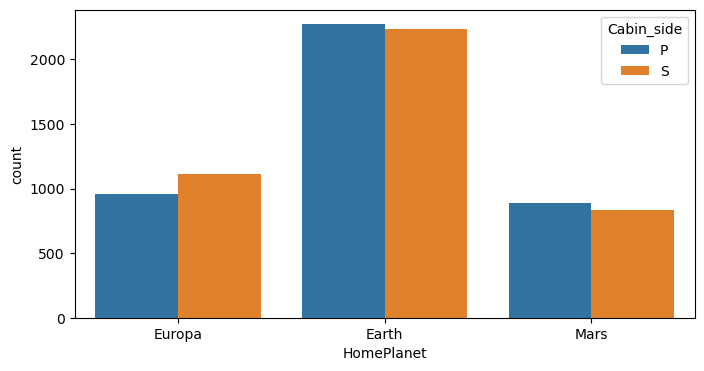

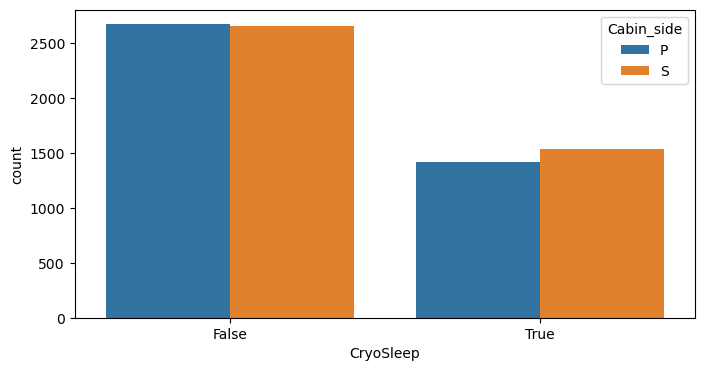

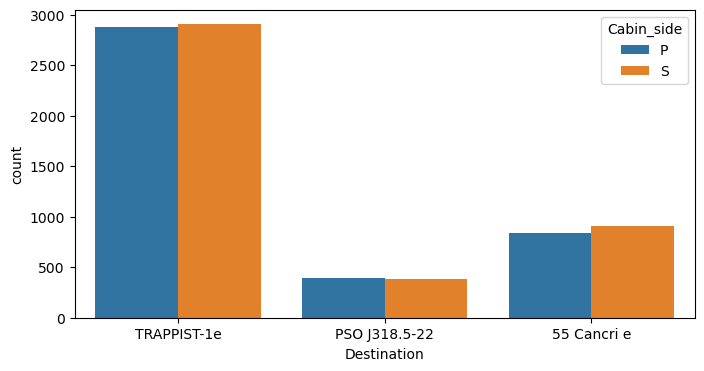

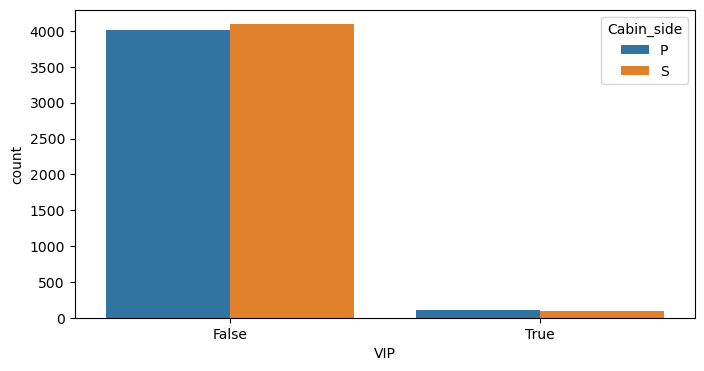

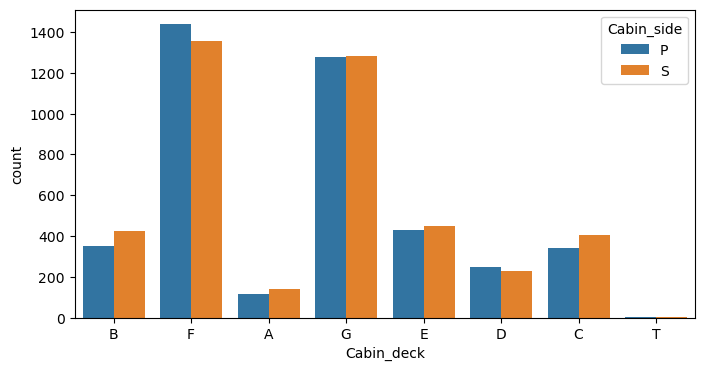

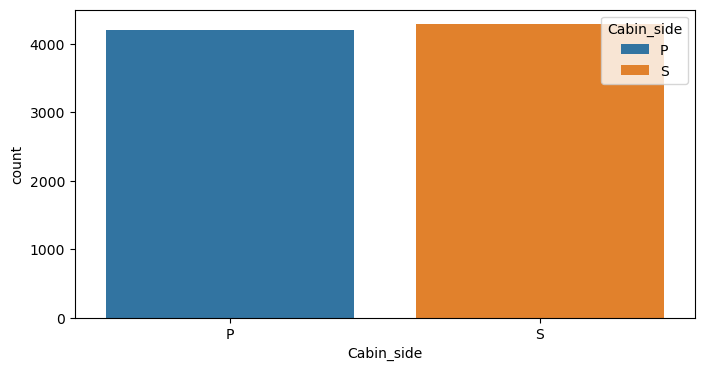

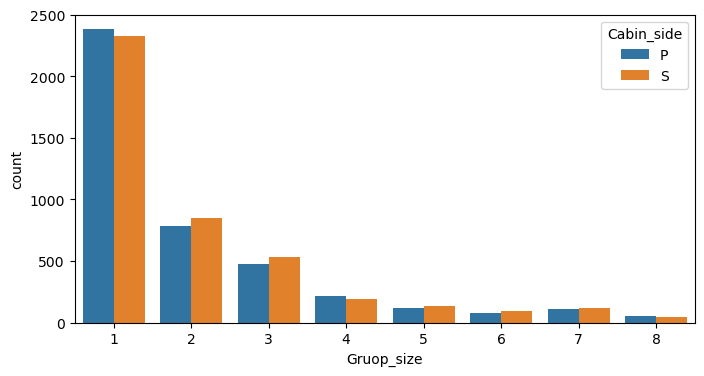

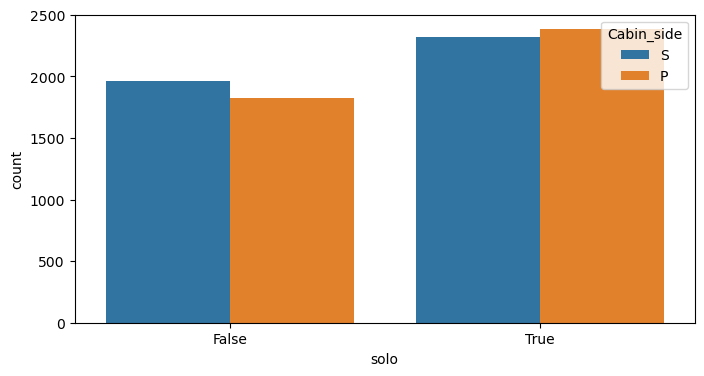

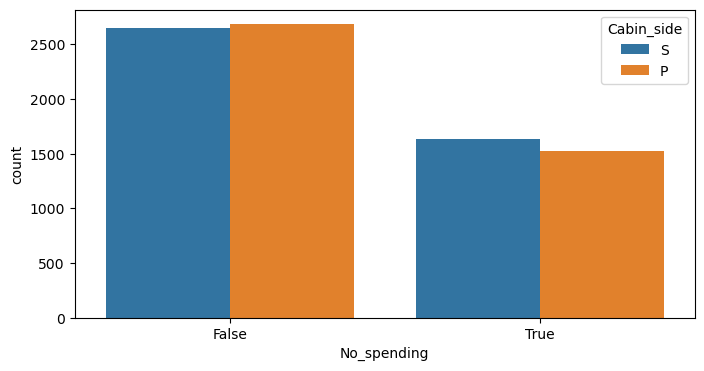

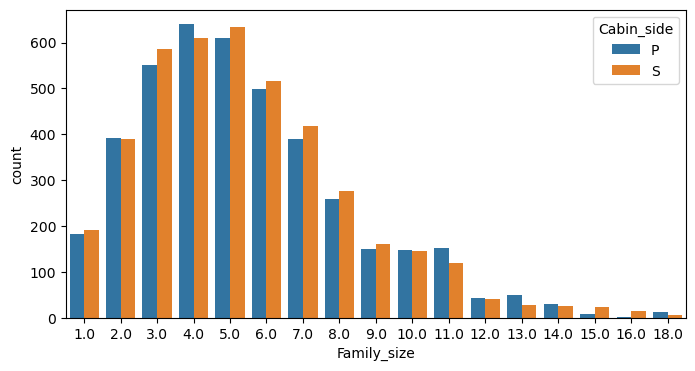

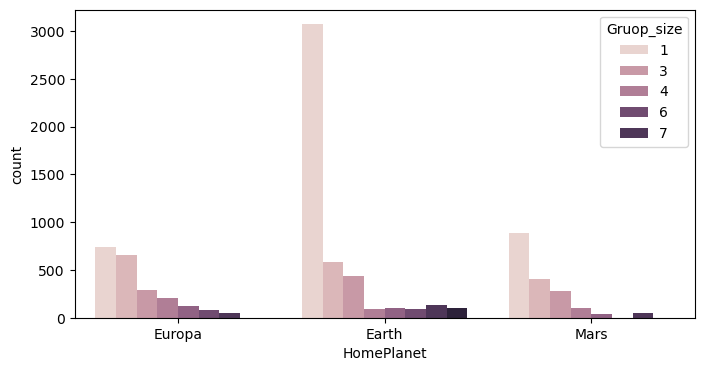

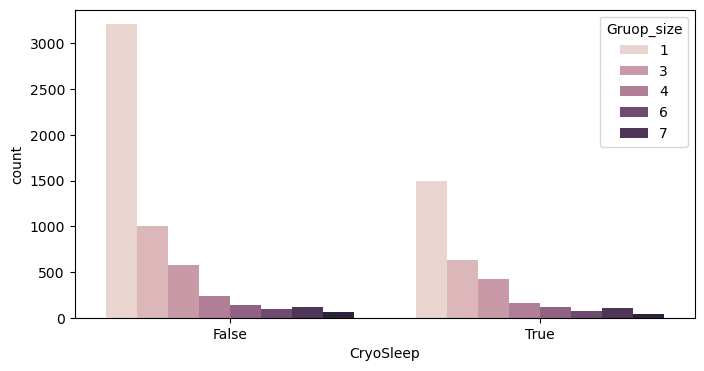

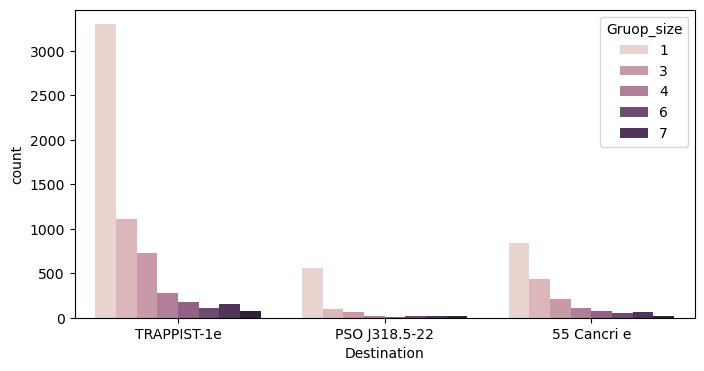

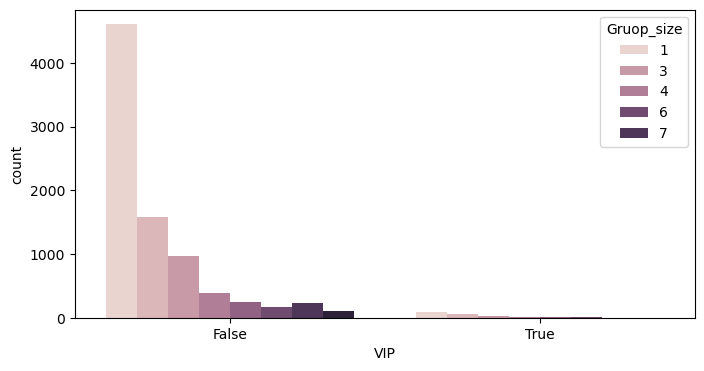

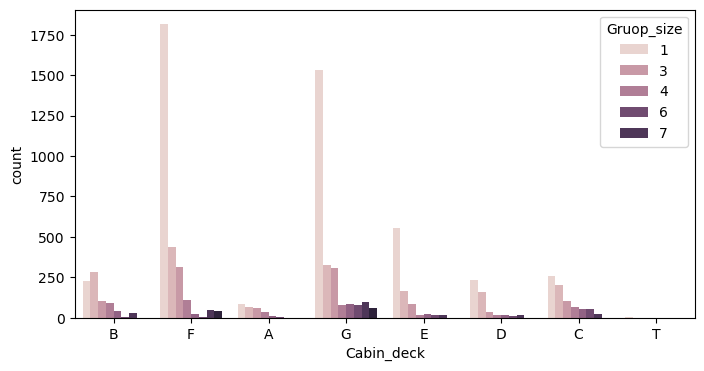

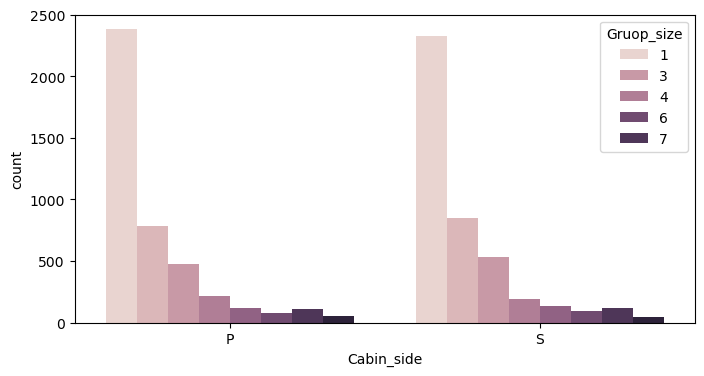

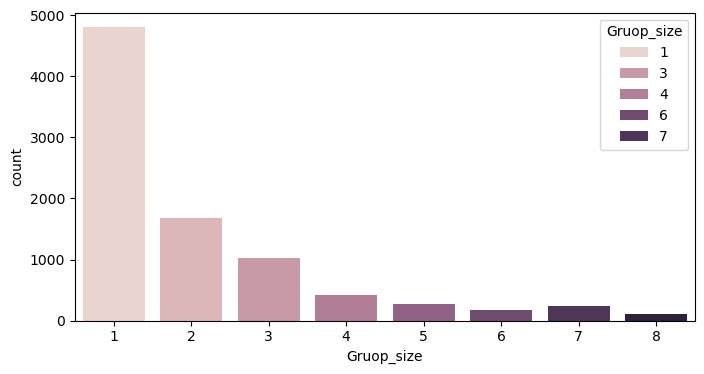

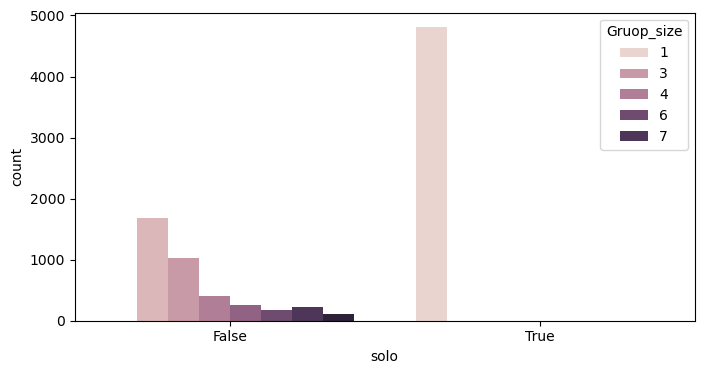

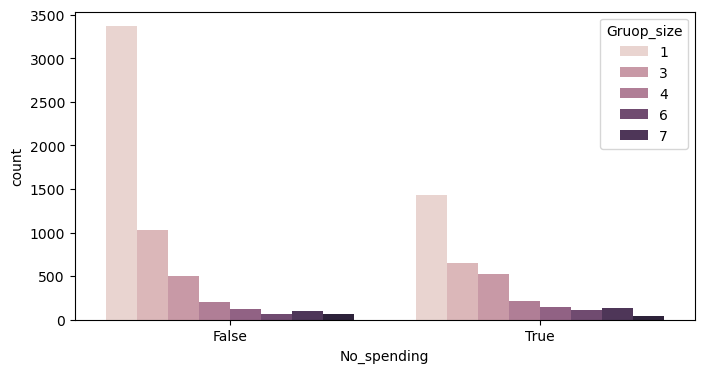

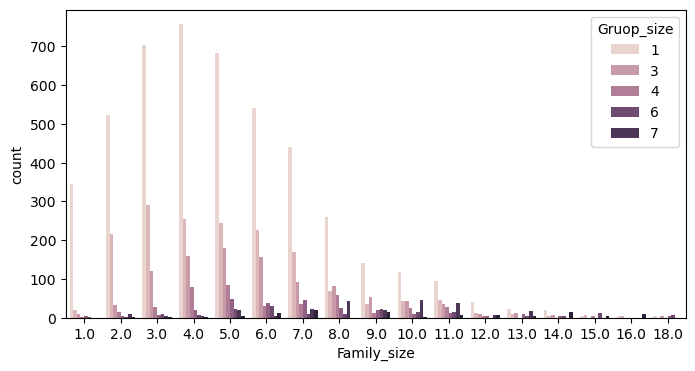

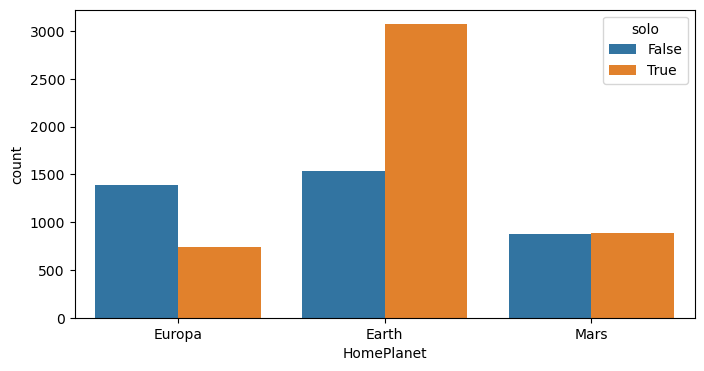

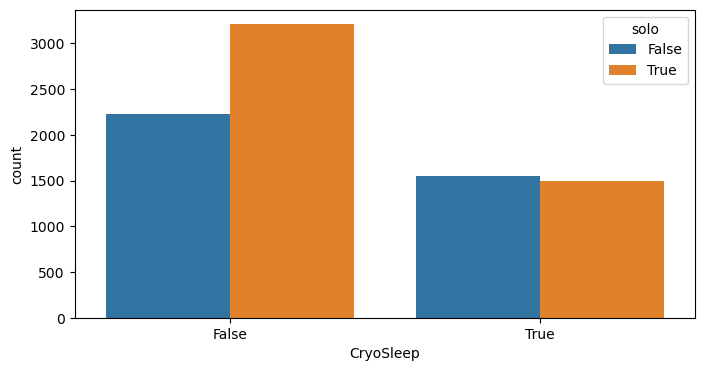

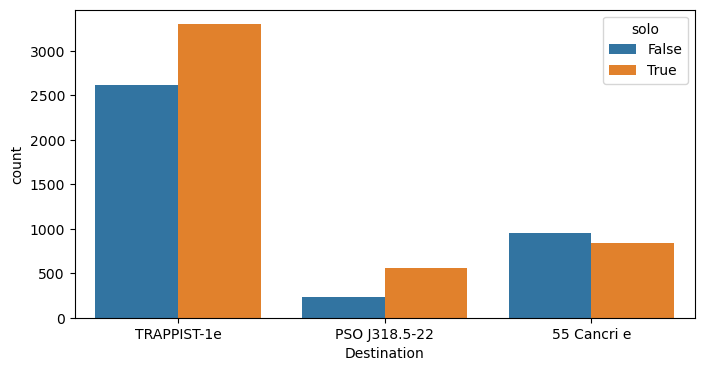

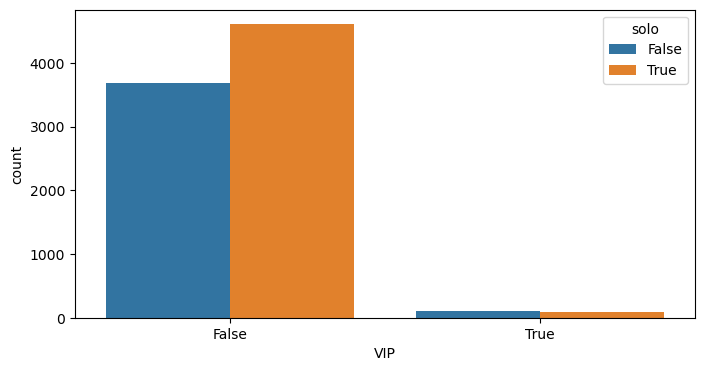

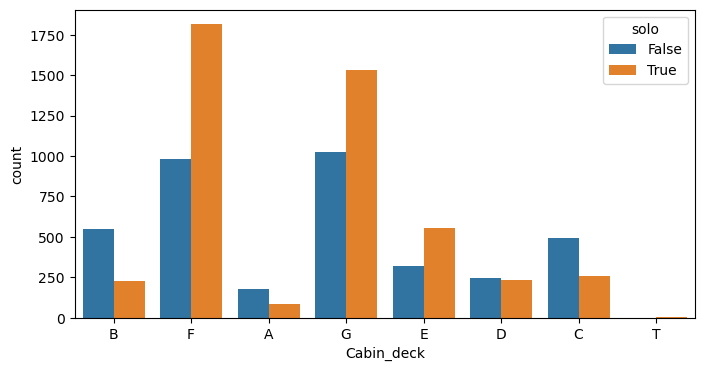

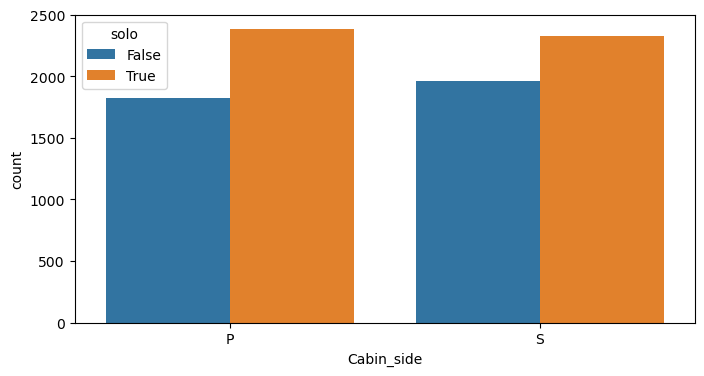

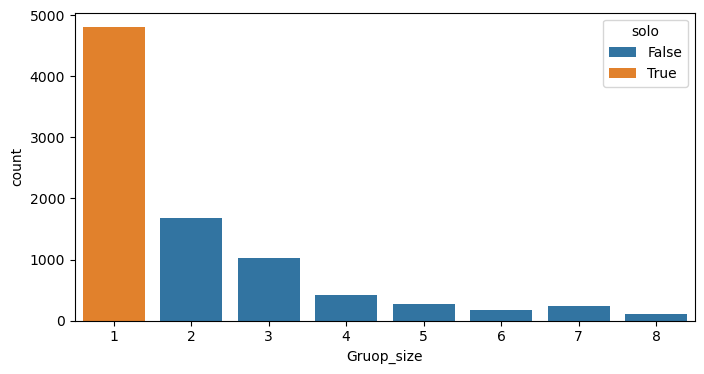

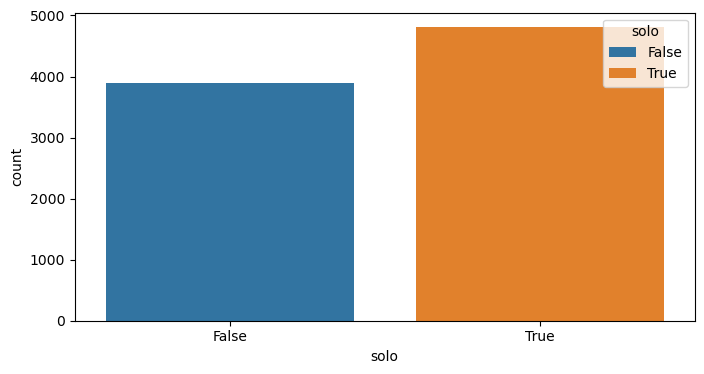

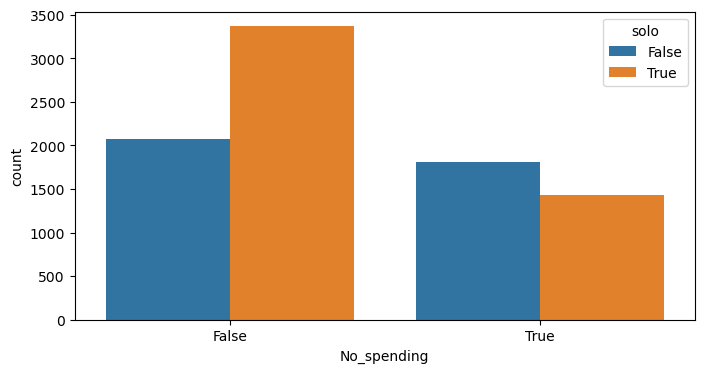

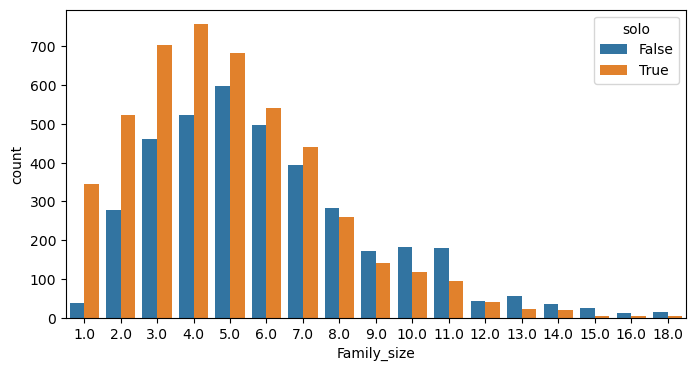

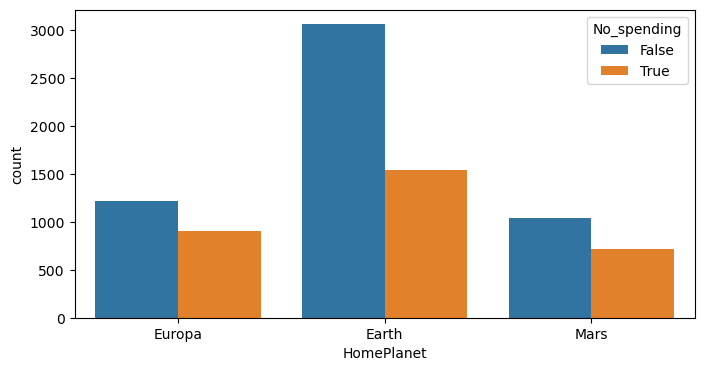

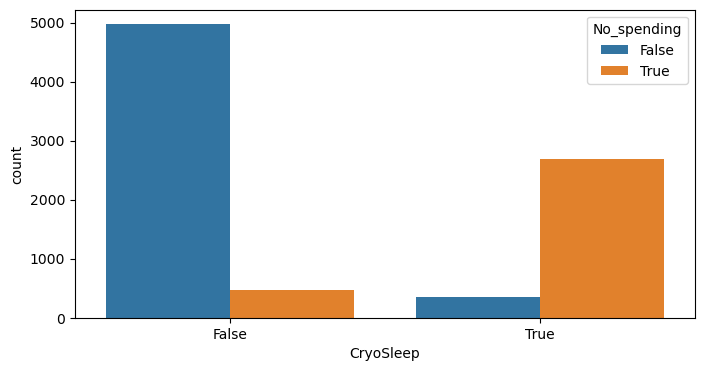

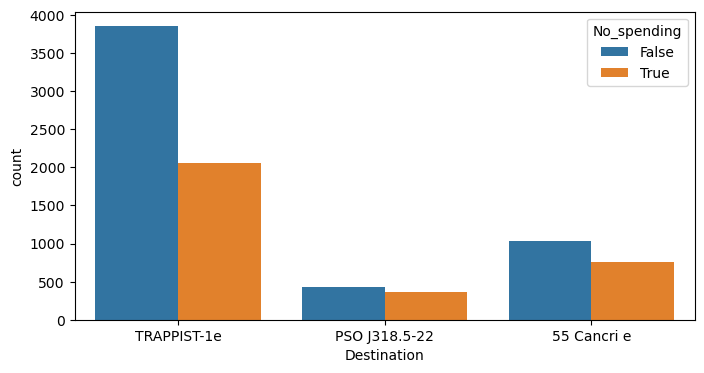

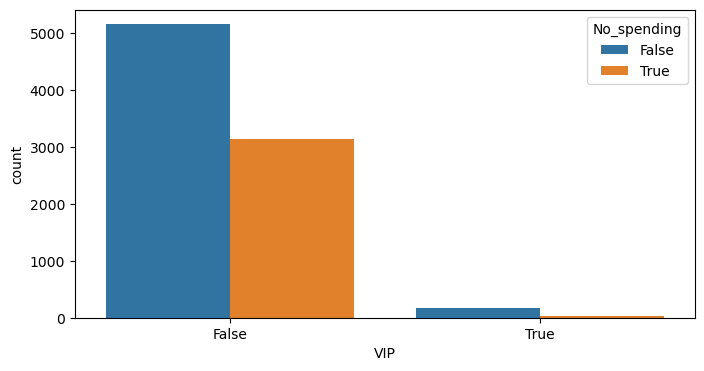

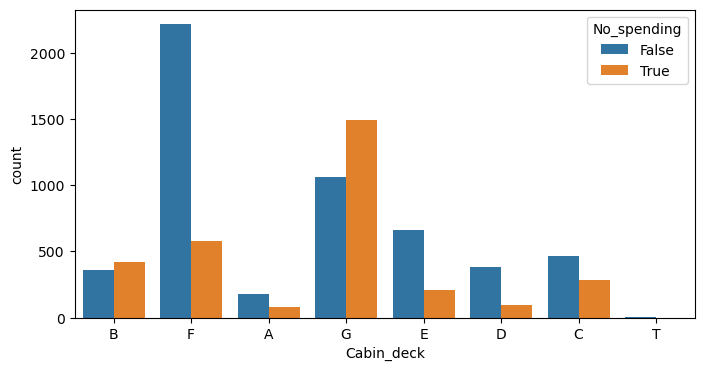

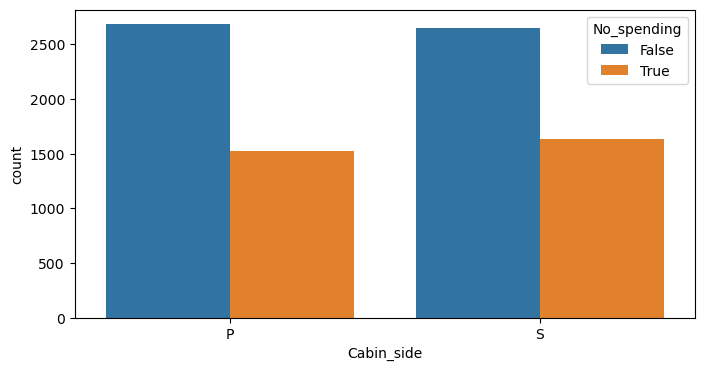

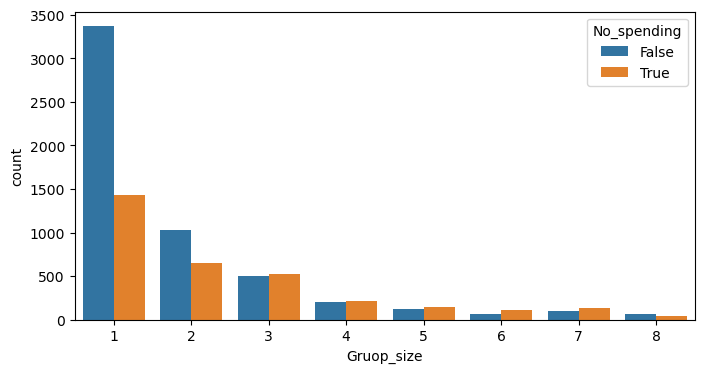

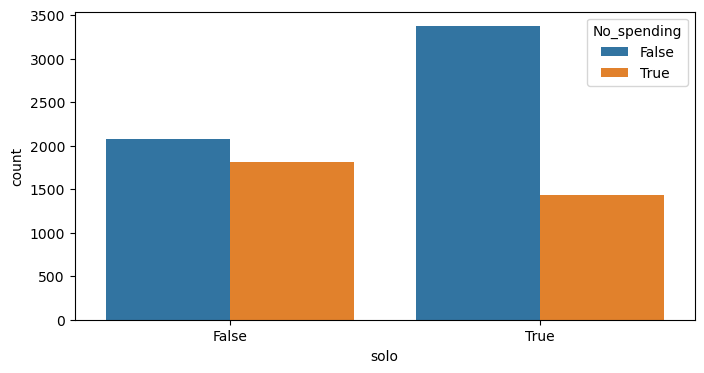

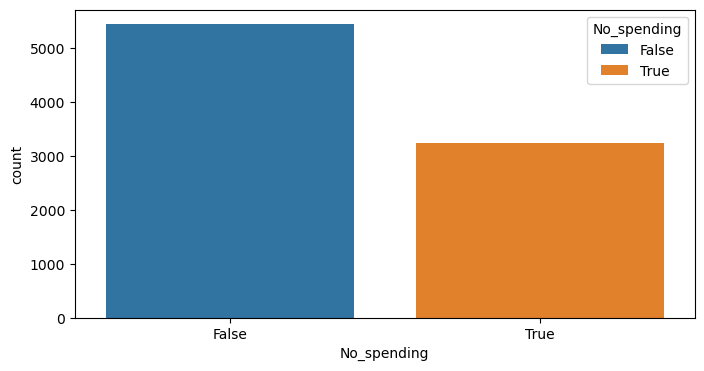

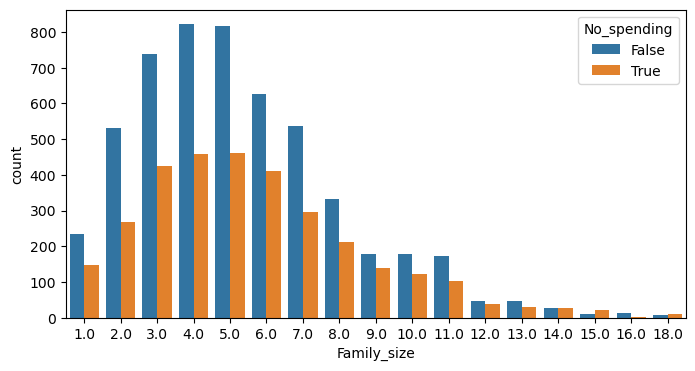

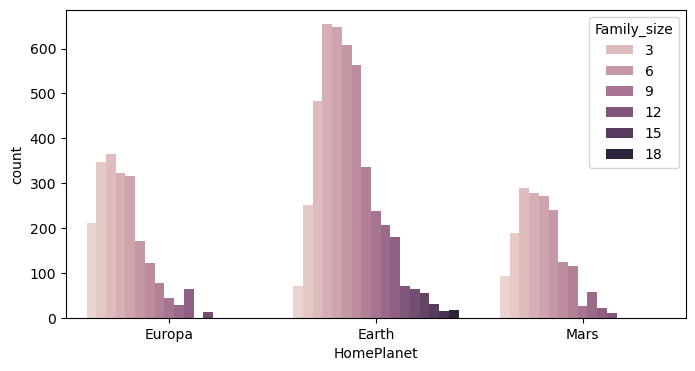

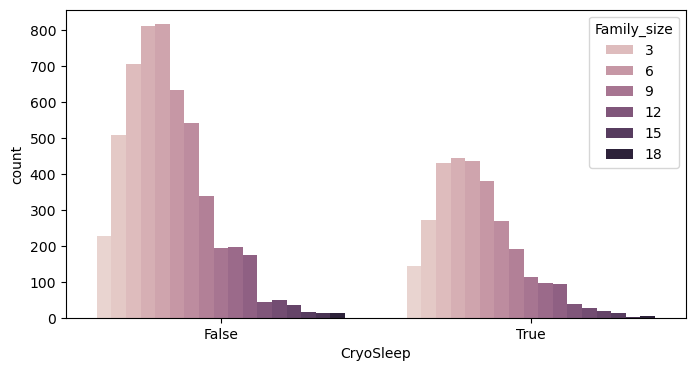

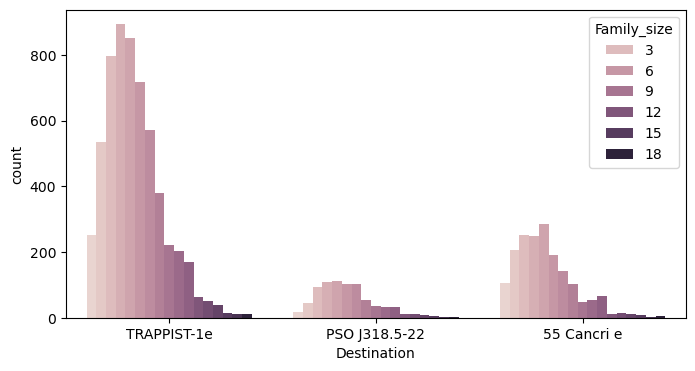

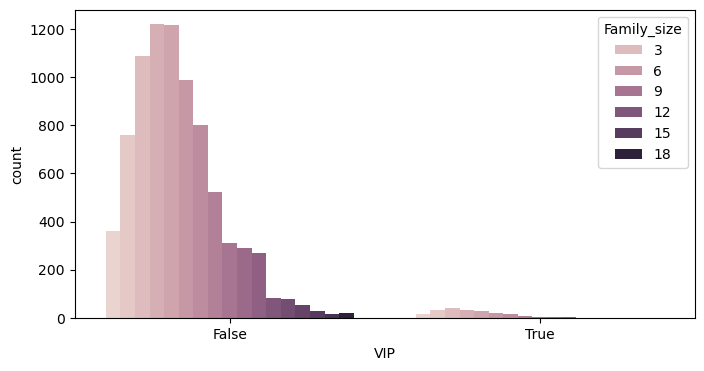

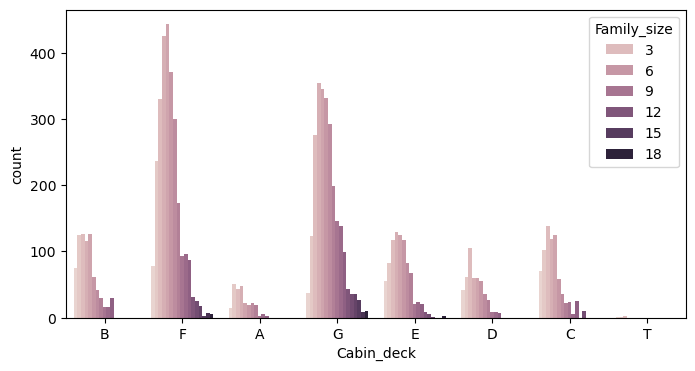

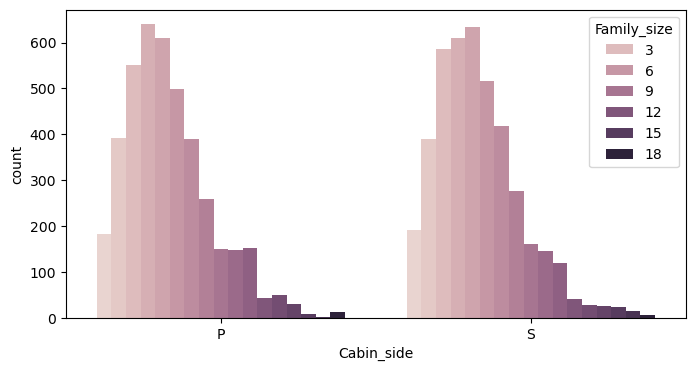

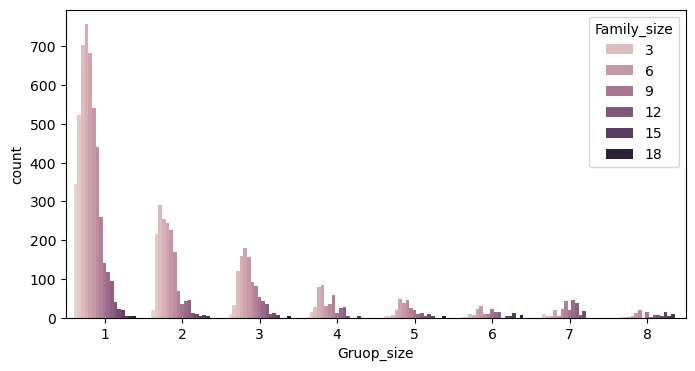

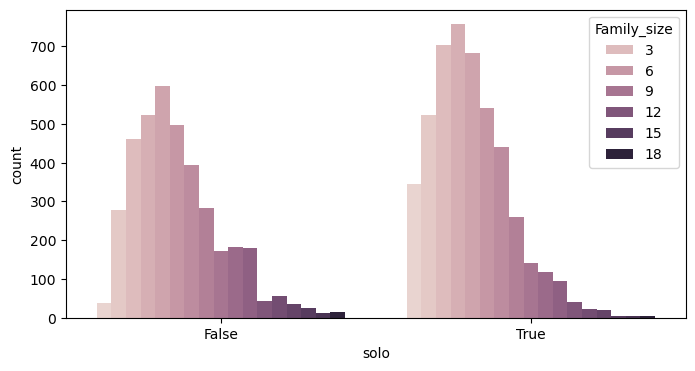

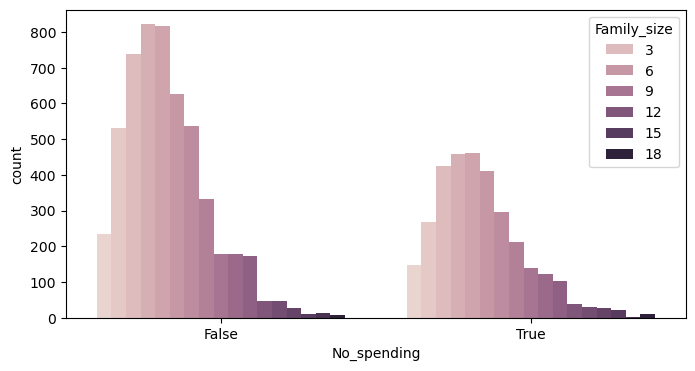

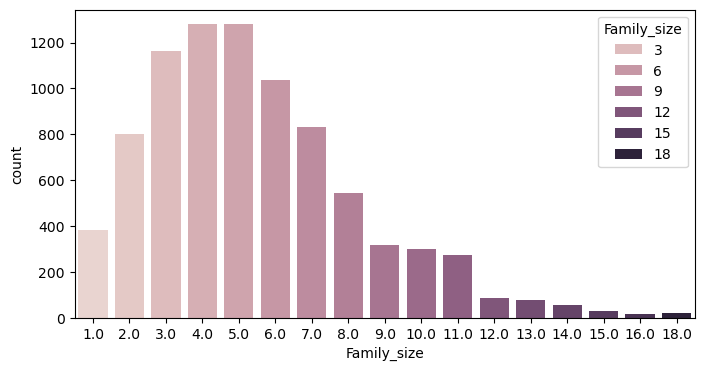

In [ ]:
for hue in cat_col :
    for col in cat_col :
        plt.figure(figsize=(8,4))
        sns.countplot(data=data1,x=col,hue=hue)
        plt.show()

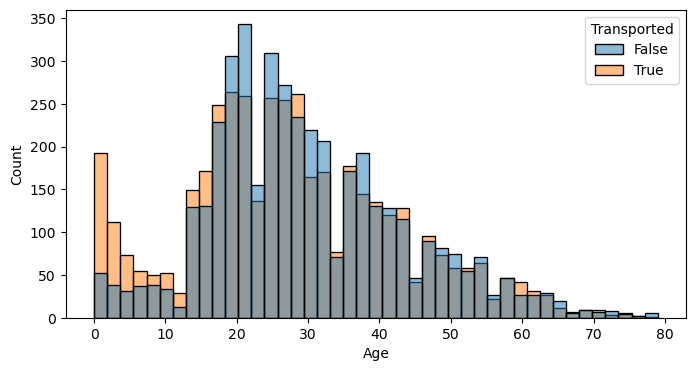

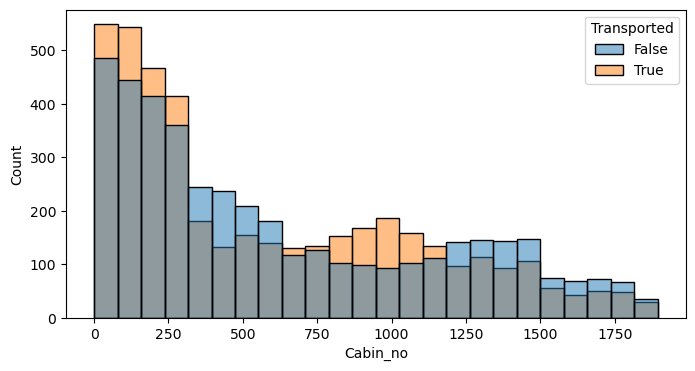

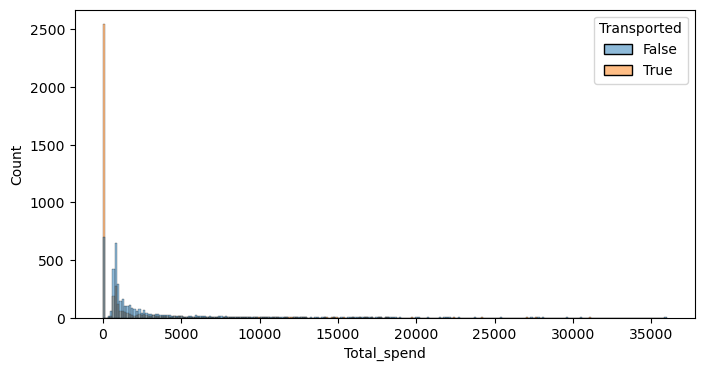

In [ ]:
for col in num_col:
    plt.figure(figsize=(8,4))
    sns.histplot(data=data1,x=col,hue='Transported')
    plt.show()

## Imputing Missing Values

In [ ]:
for val in df:
    val.loc[(val['VIP'].isna()),'VIP'] = True
    val.loc[(val['Destination'].isna()),'Destination'] = 'TRAPPIST-1e'
    print(val['VIP'].isna().sum())
    print(val['Destination'].isna().sum())

0
0
0
0


In [ ]:
for val in df :
    planet_counts = val.groupby(['Gruop_no', 'HomePlanet']).size().unstack(fill_value=0)
    most_common_planet = planet_counts.idxmax(axis=1)

    missing_homeplanet = val['HomePlanet'].isna()
    in_known_group = val['Gruop_no'].isin(most_common_planet.index)
    to_fill = missing_homeplanet & in_known_group
    val.loc[to_fill, 'HomePlanet'] = val.loc[to_fill, 'Gruop_no'].map(most_common_planet)

    print(f"Missing values after: {val['HomePlanet'].isna().sum()}")



Missing values after: 111
Missing values after: 46


In [ ]:
for val in df :
    planet_counts = val.groupby(['Surname', 'HomePlanet']).size().unstack(fill_value=0)
    most_common_planet = planet_counts.idxmax(axis=1)

    missing_homeplanet = val['HomePlanet'].isna()
    in_known_group = val['Surname'].isin(most_common_planet.index)
    to_fill = missing_homeplanet & in_known_group
    val.loc[to_fill, 'HomePlanet'] = val.loc[to_fill, 'Surname'].map(most_common_planet)

    print(f"Missing values after: {val['HomePlanet'].isna().sum()}")



Missing values after: 12
Missing values after: 16


In [ ]:
for val in df :
    val.loc[(val['HomePlanet'].isna()) & (val['Cabin_deck']=='G'),'HomePlanet'] = 'Earth'
    val.loc[(val['HomePlanet'].isna()) & (val['Cabin_deck'].isin(['C', 'T', 'A'])),'HomePlanet'] = 'Europa'
    print(f"Missing values after: {val['HomePlanet'].isna().sum()}")



Missing values after: 8
Missing values after: 14


In [ ]:
for val in df :
    val.loc[(val['HomePlanet'].isna()) & (val['Cabin_deck']!='B'),'HomePlanet'] = 'Earth'
    val.loc[(val['HomePlanet'].isna()) & (val['Cabin_deck']== 'E'),'HomePlanet'] = 'Mars'
    print(f"Missing values after: {val['HomePlanet'].isna().sum()}")



Missing values after: 0
Missing values after: 3


In [ ]:
for val in df :
    val.loc[(val['HomePlanet'].isna()),'HomePlanet'] = 'Earth'
    print(f"Missing values after: {val['HomePlanet'].isna().sum()}")

Missing values after: 0
Missing values after: 0


In [ ]:
for val in df :
    planet_counts = val.groupby(['Gruop_no', 'Surname']).size().unstack(fill_value=0)
    most_common_planet = planet_counts.idxmax(axis=1)

    missing_homeplanet = val['Surname'].isna()
    in_known_group = val['Gruop_no'].isin(most_common_planet.index)
    to_fill = missing_homeplanet & in_known_group
    val.loc[to_fill, 'Surname'] = val.loc[to_fill, 'Gruop_no'].map(most_common_planet)

    print(f"Missing values after: {val['Surname'].isna().sum()}")

Missing values after: 104
Missing values after: 51


In [ ]:
for val in df:
    s_n = val['Surname'].value_counts().astype(int)
    val['Family_size'] = val['Surname'].map(s_n)

In [ ]:
for val in df :
    planet_counts = val.groupby(['Gruop_no', 'Cabin_deck']).size().unstack(fill_value=0)
    most_common_planet = planet_counts.idxmax(axis=1)

    missing_homeplanet = val['Cabin_deck'].isna()
    in_known_group = val['Gruop_no'].isin(most_common_planet.index)
    to_fill = missing_homeplanet & in_known_group
    val.loc[to_fill, 'Cabin_deck'] = val.loc[to_fill, 'Gruop_no'].map(most_common_planet)

    print(f"Missing values after: {val['Cabin_deck'].isna().sum()}")

Missing values after: 99
Missing values after: 63


In [ ]:
for val in df :
    planet_counts = val.groupby(['Gruop_no', 'Cabin_side']).size().unstack(fill_value=0)
    most_common_planet = planet_counts.idxmax(axis=1)

    missing_homeplanet = val['Cabin_side'].isna()
    in_known_group = val['Gruop_no'].isin(most_common_planet.index)
    to_fill = missing_homeplanet & in_known_group
    val.loc[to_fill, 'Cabin_side'] = val.loc[to_fill, 'Gruop_no'].map(most_common_planet)

    print(f"Missing values after: {val['Cabin_side'].isna().sum()}")

Missing values after: 99
Missing values after: 63


In [ ]:
for val in df:
    deck_modes = val.groupby(['HomePlanet','Destination','solo'])['Cabin_deck'].agg(lambda x: x.mode()[0])
    mask = val['Cabin_deck'].isna()
    val.loc[mask, 'Cabin_deck'] = val[mask].apply(lambda row: deck_modes.get((row['HomePlanet'], row['Destination'], row['solo'])),axis=1)
    print(f"Missing values after: {val['Cabin_deck'].isna().sum()}")

Missing values after: 0
Missing values after: 0


In [ ]:
from sklearn.linear_model import LinearRegression
for col in df:
    for deck in ['A', 'B', 'C', 'D', 'E', 'F', 'G']:
        X_CN = col.loc[~col['Cabin_no'].isna() & (col['Cabin_deck'] == deck), 'Gruop_no']
        y_CN = col.loc[~col['Cabin_no'].isna() & (col['Cabin_deck'] == deck), 'Cabin_no']
        X_test_CN = col.loc[col['Cabin_no'].isna() & (col['Cabin_deck'] == deck), 'Gruop_no']

        if not X_test_CN.empty and not X_CN.empty:
            model_CN = LinearRegression()
            model_CN.fit(X_CN.values.reshape(-1, 1), y_CN)
            preds_CN = model_CN.predict(X_test_CN.values.reshape(-1, 1))
            col.loc[col['Cabin_no'].isna() & (col['Cabin_deck'] == deck), 'Cabin_no'] = preds_CN.round().astype(int)

print(f"Missing values after filling: {col['Cabin_no'].isna().sum()}")


Missing values after filling: 0


In [ ]:
for val in df :
    val['Cabin_region1'] = (val['Cabin_no'] < 500)
    val['Cabin_region2'] = (val['Cabin_no'] >= 500 )& (val['Cabin_no'] < 1000)
    val['Cabin_region3'] = (val['Cabin_no'] >= 1000) & (val['Cabin_no'] < 1500)
    val['Cabin_region4'] = (val['Cabin_no'] >= 1500)

In [ ]:
for val in df:
    deck_modes = val.groupby(['HomePlanet','Destination','solo','Cabin_deck','No_spending'])['Age'].agg(lambda x: x.median())
    mask = val['Age'].isna()
    val.loc[mask, 'Age'] = val[mask].apply(lambda row: deck_modes.get((row['HomePlanet'], row['Destination'], row['solo'] , row['Cabin_deck'], row['No_spending'])),axis=1)
    print(f"Missing values after: {val['Age'].isna().sum()}")

Missing values after: 0
Missing values after: 0


In [ ]:
for val in df :
    val['Age'] = np.where(val['Age'].isna(),500,val['Age'])
    val['Age_0-20'] = (val['Age'] < 20)
    val['Age_20-40'] = (val['Age'] >= 20) & (val['Age'] < 40)
    val['Age_40-60'] = (val['Age'] >= 40) & (val['Age'] < 60)
    val['Age_60-80'] = (val['Age'] >= 60) & (val['Age'] < 80)
    val['Age_80+'] = (val['Age'] >= 80)
    val['Age'] = np.where(val['Age'] == 500 ,np.nan,val['Age'])

In [ ]:
for val in df:
    for col in ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Total_spend']:
        deck_modes = val.groupby(['HomePlanet','Destination','solo','Cabin_deck','Age',])[col].agg(lambda x: x.mean())
        mask = val[col].isna()
        val.loc[mask, col ] = val[mask].apply(lambda row: deck_modes.get((row['HomePlanet'], row['Destination'], row['solo'] , row['Cabin_deck'], row['Age'])),axis=1)
        print(f"Missing values after: {val[col].isna().sum()}")

Missing values after: 12
Missing values after: 17
Missing values after: 20
Missing values after: 15
Missing values after: 17
Missing values after: 87
Missing values after: 13
Missing values after: 9
Missing values after: 16
Missing values after: 18
Missing values after: 10
Missing values after: 70


In [ ]:
for val in df:
     for col in ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Total_spend']:
         val.loc[(val[col].isna()) , col] = 0
         print(f"Missing values after: {val[col].isna().sum()}")

Missing values after: 0
Missing values after: 0
Missing values after: 0
Missing values after: 0
Missing values after: 0
Missing values after: 0
Missing values after: 0
Missing values after: 0
Missing values after: 0
Missing values after: 0
Missing values after: 0
Missing values after: 0


In [ ]:
for val in df :
    val['Total_spend'] = val['RoomService']+val['FoodCourt']+val['ShoppingMall']+val['Spa']+val['VRDeck']
    val['No_spending'] = val['Total_spend'] == 0

In [ ]:
for val in df:
         val.loc[(val['CryoSleep'].isna()) & (val['No_spending']== True), 'CryoSleep'] = True
         print(f"Missing values after: {val['CryoSleep'].isna().sum()}")

Missing values after: 123
Missing values after: 56


In [ ]:
for val in df :
    planet_counts = val.groupby(['Gruop_no', 'CryoSleep']).size().unstack(fill_value=0)
    most_common_planet = planet_counts.idxmax(axis=1)

    missing_homeplanet = val['CryoSleep'].isna()
    in_known_group = val['Gruop_no'].isin(most_common_planet.index)
    to_fill = missing_homeplanet & in_known_group
    val.loc[to_fill, 'CryoSleep'] = val.loc[to_fill, 'Gruop_no'].map(most_common_planet)

    print(f"Missing values after: {val['CryoSleep'].isna().sum()}")

Missing values after: 74
Missing values after: 34


In [ ]:
for val in df:
         val.loc[(val['CryoSleep'].isna()) & (val['No_spending']== False), 'CryoSleep'] = False
         print(f"Missing values after: {val['CryoSleep'].isna().sum()}")

Missing values after: 0
Missing values after: 0


In [ ]:
data1.isna().sum()

PassengerId        0
HomePlanet         0
CryoSleep          0
Cabin            199
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name             200
Transported        0
Gruop_no           0
passenger_no       0
Cabin_deck         0
Cabin_no           0
Cabin_side        99
Cabin_region1      0
Cabin_region2      0
Cabin_region3      0
Cabin_region4      0
Gruop_size         0
solo               0
Total_spend        0
No_spending        0
Surname          104
Family_size      104
Age_0-20           0
Age_20-40          0
Age_40-60          0
Age_60-80          0
Age_80+            0
dtype: int64

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    8693 non-null   object 
 1   HomePlanet     8693 non-null   object 
 2   CryoSleep      8693 non-null   object 
 3   Cabin          8494 non-null   object 
 4   Destination    8693 non-null   object 
 5   Age            8693 non-null   float64
 6   VIP            8693 non-null   object 
 7   RoomService    8693 non-null   float64
 8   FoodCourt      8693 non-null   float64
 9   ShoppingMall   8693 non-null   float64
 10  Spa            8693 non-null   float64
 11  VRDeck         8693 non-null   float64
 12  Name           8493 non-null   object 
 13  Transported    8693 non-null   bool   
 14  Gruop_no       8693 non-null   int64  
 15  passenger_no   8693 non-null   object 
 16  Cabin_deck     8693 non-null   object 
 17  Cabin_no       8693 non-null   float64
 18  Cabin_si

In [ ]:
for val in df:
    deck_modes = val.groupby(['HomePlanet','Destination','solo'])['Cabin_side'].agg(lambda x: x.mode()[0])
    mask = val['Cabin_side'].isna()
    val.loc[mask, 'Cabin_deck'] = val[mask].apply(lambda row: deck_modes.get((row['HomePlanet'], row['Destination'], row['solo'])),axis=1)
    print(f"Missing values after: {val['Cabin_side'].isna().sum()}")

Missing values after: 99
Missing values after: 63


In [ ]:
for val in df :
    val.loc[val['Cabin_side'].isna(), 'Cabin_side'] = 'S'
    print(f"Missing values after: {val['Cabin_side'].isna().sum()}")


Missing values after: 0
Missing values after: 0


In [ ]:
for col in data1 :
    print(data1[col].value_counts())

PassengerId
0001_01    1
6136_01    1
6141_01    1
6139_06    1
6139_05    1
          ..
3126_01    1
3124_03    1
3124_02    1
3124_01    1
9280_02    1
Name: count, Length: 8693, dtype: int64
HomePlanet
Earth     4715
Europa    2174
Mars      1804
Name: count, dtype: int64
CryoSleep
False    5540
True     3153
Name: count, dtype: int64
Cabin
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: count, Length: 6560, dtype: int64
Destination
TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64
Age
24.0    341
18.0    325
21.0    311
23.0    303
19.0    294
       ... 
77.0      2
32.5      1
38.5      1
26.5      1
23.5      1
Name: count, Length: 89, dtype: int64
VIP
False    8291
True      402
Name: count, dtype: int64
RoomService
0.0       5640
1.0        118
2.0         79
3.0         61
4.0         47
          ... 
3865.0       1
1097.0

In [ ]:
data1.isna().sum()

PassengerId        0
HomePlanet         0
CryoSleep          0
Cabin            199
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name             200
Transported        0
Gruop_no           0
passenger_no       0
Cabin_deck         0
Cabin_no           0
Cabin_side         0
Cabin_region1      0
Cabin_region2      0
Cabin_region3      0
Cabin_region4      0
Gruop_size         0
solo               0
Total_spend        0
No_spending        0
Surname          104
Family_size      104
Age_0-20           0
Age_20-40          0
Age_40-60          0
Age_60-80          0
Age_80+            0
dtype: int64

In [ ]:
for val in df:
    val.drop(['Name','Cabin','Surname','Family_size','PassengerId','passenger_no'],axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
le2= LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()
le5 = LabelEncoder()
le6 = LabelEncoder()

In [ ]:
for val in df:
    val['HomePlanet'] = le1.fit_transform(val['HomePlanet'])
    val['CryoSleep'] = le2.fit_transform(val['CryoSleep'])
    val['Destination'] = le3.fit_transform(val['Destination'])
    val['VIP'] = le4.fit_transform(val['VIP'])
    val['Cabin_deck'] = le5.fit_transform(val['Cabin_deck'])
    val['Cabin_side'] = le6.fit_transform(val['Cabin_side'])

In [ ]:
for val in df:
    val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HomePlanet     8693 non-null   int32  
 1   CryoSleep      8693 non-null   int32  
 2   Destination    8693 non-null   int32  
 3   Age            8693 non-null   float64
 4   VIP            8693 non-null   int32  
 5   RoomService    8693 non-null   float64
 6   FoodCourt      8693 non-null   float64
 7   ShoppingMall   8693 non-null   float64
 8   Spa            8693 non-null   float64
 9   VRDeck         8693 non-null   float64
 10  Transported    8693 non-null   bool   
 11  Gruop_no       8693 non-null   int64  
 12  Cabin_deck     8693 non-null   int32  
 13  Cabin_no       8693 non-null   float64
 14  Cabin_side     8693 non-null   int32  
 15  Cabin_region1  8693 non-null   bool   
 16  Cabin_region2  8693 non-null   bool   
 17  Cabin_region3  8693 non-null   bool   
 18  Cabin_re

In [ ]:
x = data1.drop('Transported',axis=1)
y = data['Transported']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,xgb.predict(X_test))

0.796688132474701

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = XGBClassifier()
gb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
accuracy_score(y_test,gb.predict(X_test))

0.796688132474701

In [ ]:
param = {
     'n_estimators': [300, 400, 500],
    'max_depth': [5, 6, 7],
    'learning_rate': [0.03, 0.05, 0.07],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.3],
    'reg_alpha': [0.3, 0.5, 0.7],
    'reg_lambda': [1, 1.5, 2.0],
    'min_child_weight': [1, 3, 5]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rsv = RandomizedSearchCV(xgb,param_distributions =param,n_iter=5,cv=5)

In [ ]:
rsv.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=5,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'gamma': [0, 0.1, 0.3],
                                        'learning_rate': [0.03, 0.05, 0.07],
                                        'max_depth': [5, 6, 7],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [300, 400, 500],
                                        'reg_alpha': [0.3, 0.5, 0.7],
                                        'reg_lambda': [1, 1.5, 2.0],
                                        'subsample': [0.8, 0.9]})

In [ ]:
rsv.best_score_

0.8073321829284945

In [ ]:
rsv.best_params_

{'subsample': 0.8,
 'reg_lambda': 1,
 'reg_alpha': 0.5,
 'n_estimators': 300,
 'max_depth': 5,
 'learning_rate': 0.05,
 'gamma': 0,
 'colsample_bytree': 0.8}